## PROBLEM 1

####  Problem Statement:                                                                                                                                                                                                      You are an analyst in a consumer goods appliance company and is involved in forecasting sales and providing business recommendations to the company at an all-India level. You have to correctly suggest business strategies for the sale of different products across different cities in India. Appropriate forecasting models need to be created for the same.

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('data_t10.csv')
df.head()

product        date    city    sales
0  Mixers  04-01-2014  Mumbai  2679347
1  Mixers  05-01-2014  Mumbai  3864612
2  Mixers  06-01-2014  Mumbai  2932658
3  Mixers  07-01-2014  Mumbai  3703713
4  Mixers  08-01-2014  Mumbai  3931029

# Basic Data Exploration 

In [3]:
df.head()

product        date    city    sales
0  Mixers  04-01-2014  Mumbai  2679347
1  Mixers  05-01-2014  Mumbai  3864612
2  Mixers  06-01-2014  Mumbai  2932658
3  Mixers  07-01-2014  Mumbai  3703713
4  Mixers  08-01-2014  Mumbai  3931029

In [4]:
df.shape

(4800, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  4800 non-null   object
 1   date     4800 non-null   object
 2   city     4800 non-null   object
 3   sales    4800 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 150.1+ KB


In [6]:
df.describe(include= 'all')

product        date       city         sales
count      4800        4800       4800  4.800000e+03
unique       10          48         10           NaN
top     coolers  10-01-2016  Bangalore           NaN
freq        480         100        480           NaN
mean        NaN         NaN        NaN  7.415188e+05
std         NaN         NaN        NaN  1.308447e+06
min         NaN         NaN        NaN  0.000000e+00
25%         NaN         NaN        NaN  1.171152e+05
50%         NaN         NaN        NaN  3.077215e+05
75%         NaN         NaN        NaN  7.796660e+05
max         NaN         NaN        NaN  1.588133e+07

In [7]:
df.describe()

sales
count  4.800000e+03
mean   7.415188e+05
std    1.308447e+06
min    0.000000e+00
25%    1.171152e+05
50%    3.077215e+05
75%    7.796660e+05
max    1.588133e+07

In [8]:
df.city.unique()

array(['Mumbai', 'Kolkata', 'Hyderabad', 'Bangalore', 'Chennai', 'Cochin',
       'Ahmd', 'Patna', 'Pune', 'Delhi'], dtype=object)

In [9]:
df['product'].unique()

array(['Mixers', 'Induction cookers', 'Dry Iron', 'coolers',
       'Water Heaters', 'FoodProcessor', 'Gas Stove',
       'Oven Toaster Grill', 'Steam Iron', 'SECF'], dtype=object)

In [10]:
df['city'].value_counts()

Bangalore    480
Chennai      480
Patna        480
Kolkata      480
Cochin       480
Delhi        480
Ahmd         480
Hyderabad    480
Pune         480
Mumbai       480
Name: city, dtype: int64

In [11]:
df['product'].value_counts()

coolers               480
Mixers                480
Dry Iron              480
Induction cookers     480
Oven Toaster Grill    480
Steam Iron            480
FoodProcessor         480
SECF                  480
Gas Stove             480
Water Heaters         480
Name: product, dtype: int64

In [12]:
df.skew()

sales    4.596524
dtype: float64

## Missing Value 

In [13]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

Total  Percent
product      0      0.0
date         0      0.0
city         0      0.0
sales        0      0.0

## EXPLORATORY DATA ANALYSIS

## MONTHLY 

In [50]:
monthly_sales_across_years = pd.pivot_table(df, values = 'sales', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

date      April     August   December   February    January       July  \
date                                                                     
2014  12.020460  11.270849  12.361023        NaN        NaN  11.241866   
2015  12.384572  11.361394  12.515344  12.408757  12.536774  11.427947   
2016  12.917880  11.523921  12.367970  12.528634  12.479016  11.482731   
2017  12.361043  11.900185  12.789327  12.780599  12.801546  11.847507   
2018        NaN        NaN        NaN  12.852024  13.069575        NaN   

date       June      March        May   November    October  September  
date                                                                    
2014  11.987662        NaN  12.443415  11.855503  12.253826  11.412014  
2015  11.955730  12.745961  12.655887  12.214819  12.555030  11.384063  
2016  11.963114  13.020726  12.656028  12.148400  12.688826  11.719794  
2017  12.659019  13.126773  13.126994  12.373778  13.018566  12.028903  
2018        NaN  13.056617        NaN        NaN        NaN        NaN

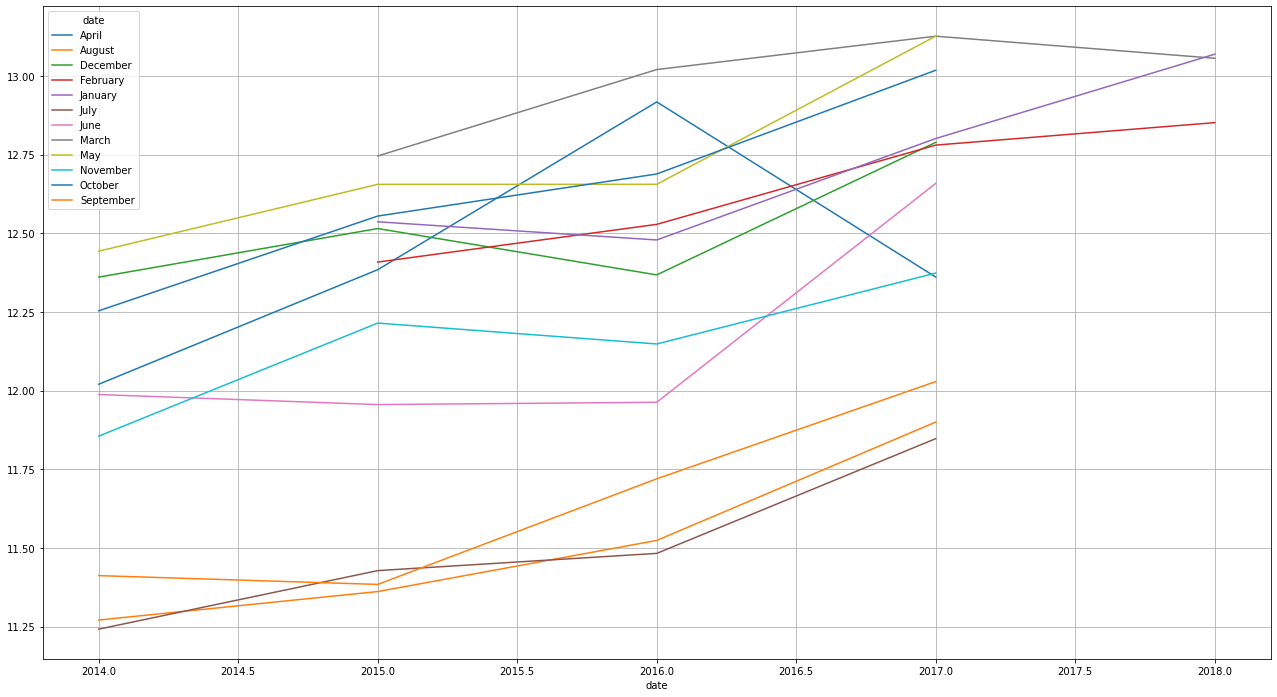

In [51]:
fig, ax = plt.subplots(figsize=(22,12))
monthly_sales_across_years.plot(ax=ax)
plt.grid();

## YEARLY

In [53]:
yearly_sales_across_months = pd.pivot_table(df, values = 'sales', columns = df.index.month, 
                                        index = df.index.year)

yearly_sales_across_months

date         1          2          3          4          5          6   \
date                                                                     
2014        NaN        NaN        NaN  12.020460  12.443415  11.987662   
2015  12.536774  12.408757  12.745961  12.384572  12.655887  11.955730   
2016  12.479016  12.528634  13.020726  12.917880  12.656028  11.963114   
2017  12.801546  12.780599  13.126773  12.361043  13.126994  12.659019   
2018  13.069575  12.852024  13.056617        NaN        NaN        NaN   

date         7          8          9          10         11         12  
date                                                                    
2014  11.241866  11.270849  11.412014  12.253826  11.855503  12.361023  
2015  11.427947  11.361394  11.384063  12.555030  12.214819  12.515344  
2016  11.482731  11.523921  11.719794  12.688826  12.148400  12.367970  
2017  11.847507  11.900185  12.028903  13.018566  12.373778  12.789327  
2018        NaN        NaN        NaN        NaN        NaN        NaN

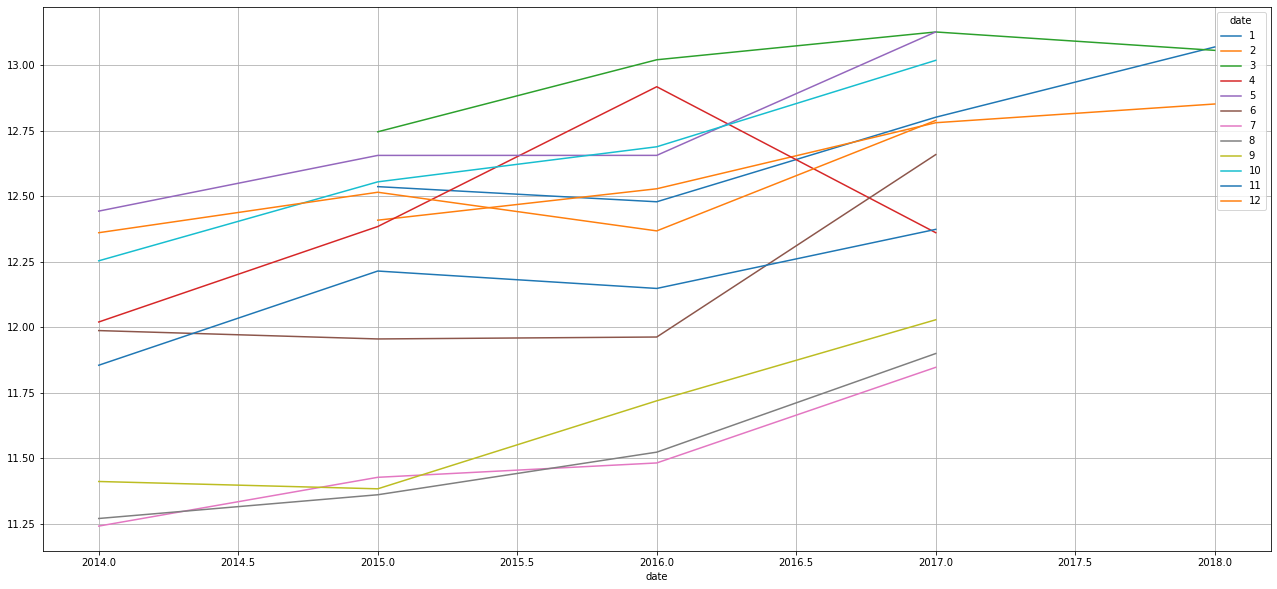

In [54]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

# Read this monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences.


### Yearly Plot

Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

In [56]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

sales
date                    
2014-12-31  10684.661730
2015-12-31  14614.627911
2016-12-31  14749.704014
2017-12-31  15081.423961
2018-12-31   3897.821571

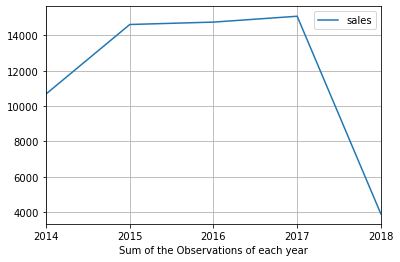

In [57]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

In [58]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean.head()

sales
date                 
2014-12-31  11.871846
2015-12-31  12.178857
2016-12-31  12.291420
2017-12-31  12.567853
2018-12-31  12.992739

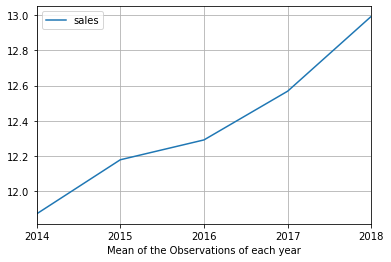

In [59]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

### Quarterly Plot

In [60]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()

sales
date                   
2014-06-30  3645.153743
2014-09-30  3392.472885
2014-12-31  3647.035102
2015-03-31  3769.149274
2015-06-30  3699.618993

In [61]:
df_quarterly_sum.plot();
plt.grid()

In [62]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

sales
date                 
2014-06-30  12.150512
2014-09-30  11.308243
2014-12-31  12.156784
2015-03-31  12.563831
2015-06-30  12.332063

In [63]:
df_quarterly_mean.plot();
plt.grid()

In [65]:
df.plot();
plt.grid()

### 2. Exploratory Data Analysis

###  1) Univariate Analysis:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

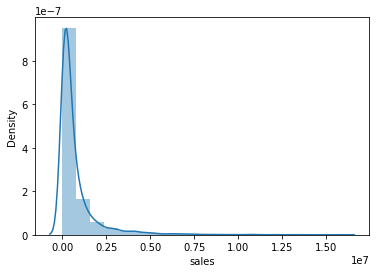

In [16]:
sns.distplot(df.sales,bins=20)  # histogram of sales

Barplot to show the product wise sales

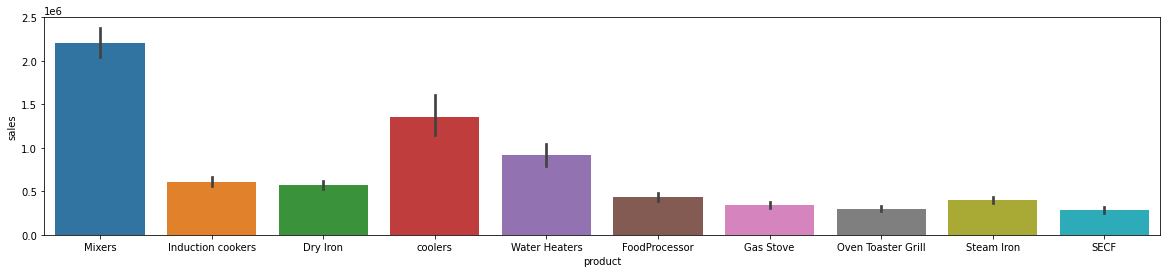

In [17]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="product", y="sales", data=df)

Barplot to show city wise sales

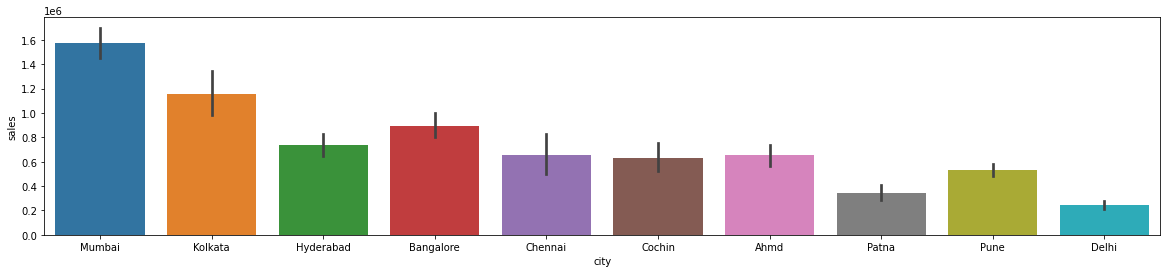

In [18]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="city", y="sales", data=df)

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='city',y='sales',hue='product')
plt.show()

In [20]:
sns.boxplot(x=df['sales'],y=df['city'])
plt.grid();

## Outlier Treatment

In [21]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [22]:
df.boxplot(column=['sales'])
plt.show()

In [23]:
lrsales,ursales=remove_outlier(df['sales'])
df['sales']=np.where(df['sales']>ursales,ursales,df['sales'])
df['sales']=np.where(df['sales']<lrsales,lrsales,df['sales'])

df.shape

(4800, 4)

## After treating outliers 

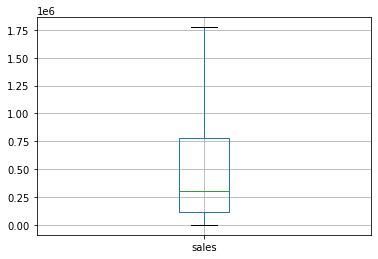

In [24]:
df.boxplot(column=['sales'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

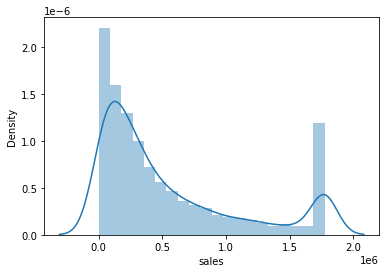

In [25]:
sns.distplot(df.sales,bins=20)

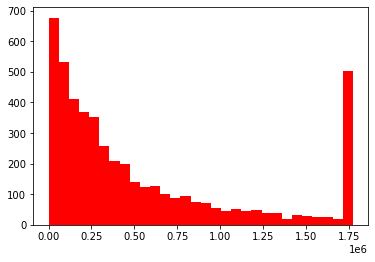

In [26]:
plt.hist(df['sales'],bins=30,color="r")
plt.show()


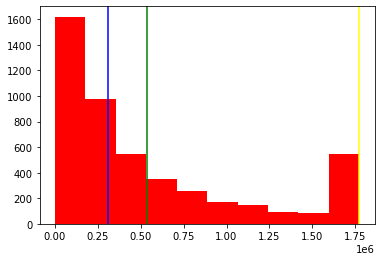

In [27]:
plt.hist(df['sales'], color='red')
plt.axvline(df['sales'].mean(), color='green', label='Mean')
plt.axvline(df['sales'].median(), color='blue', label='Median')
plt.axvline(df['sales'].mode()[0], color='yellow', label='Mode1')

In [28]:
df['sales'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1773492.125
1       1773492.125
2       1773492.125
3       1773492.125
4       1773492.125
           ...     
4795       5837.000
4796       7451.000
4797       7712.000
4798      31525.000
4799      36136.000
Name: sales, Length: 4800, dtype: float64>

In [29]:
sns.distplot(df['sales'],hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True), color='orange')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

(array([677., 533., 411., 368., 353., 257., 207., 200., 141., 122., 128.,
        100.,  86.,  95.,  76.,  70.,  56.,  46.,  53.,  46.,  47.,  37.,
         38.,  18.,  31.,  30.,  27.,  25.,  19., 503.]),
 array([      0.        ,   59116.40416667,  118232.80833333,
         177349.2125    ,  236465.61666667,  295582.02083333,
         354698.425     ,  413814.82916667,  472931.23333333,
         532047.6375    ,  591164.04166667,  650280.44583333,
         709396.85      ,  768513.25416667,  827629.65833333,
         886746.0625    ,  945862.46666667, 1004978.87083333,
        1064095.275     , 1123211.67916667, 1182328.08333333,
        1241444.4875    , 1300560.89166667, 1359677.29583333,
        1418793.7       , 1477910.10416667, 1537026.50833333,
        1596142.9125    , 1655259.31666667, 1714375.72083333,
        1773492.125     ]),
 <BarContainer object of 30 artists>)

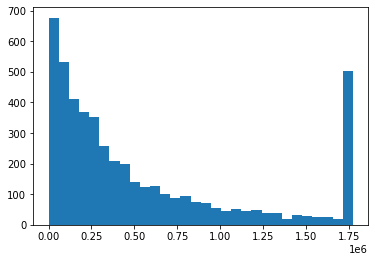

In [30]:
plt.hist(df['sales'], bins=30)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

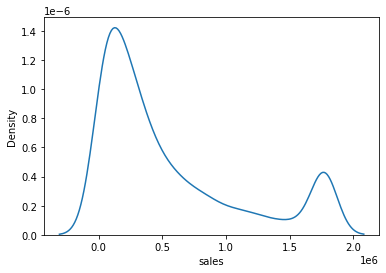

In [31]:
sns.distplot(df['sales'], hist=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales'>

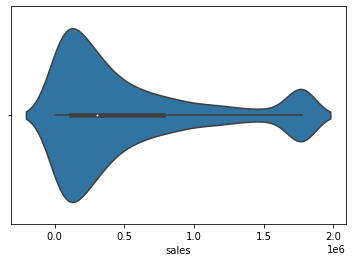

In [32]:
sns.violinplot(df['sales'])

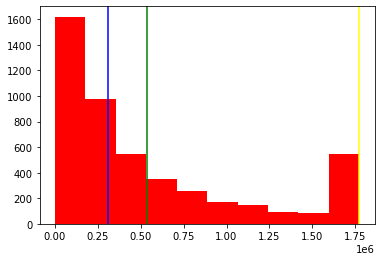

In [33]:
#plt.figure(figsize=(10,10))
plt.hist(df['sales'], color='red')
plt.axvline(df['sales'].mean(), color='green', label='Mean')
plt.axvline(df['sales'].median(), color='blue', label='Median')
plt.axvline(df['sales'].mode()[0], color='yellow', label='Mode1')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

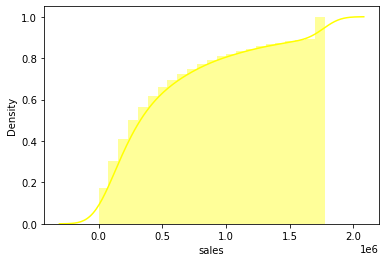

In [34]:
sns.distplot(df['sales'],hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True), color='yellow')

### 2) Bivariate analysis:

### Bar plot: 

In [35]:
df.groupby(by=['product'])['sales'].sum().reset_index().sort_values(['sales']).tail(10).plot(x='product',
                                                                                                           y='sales',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

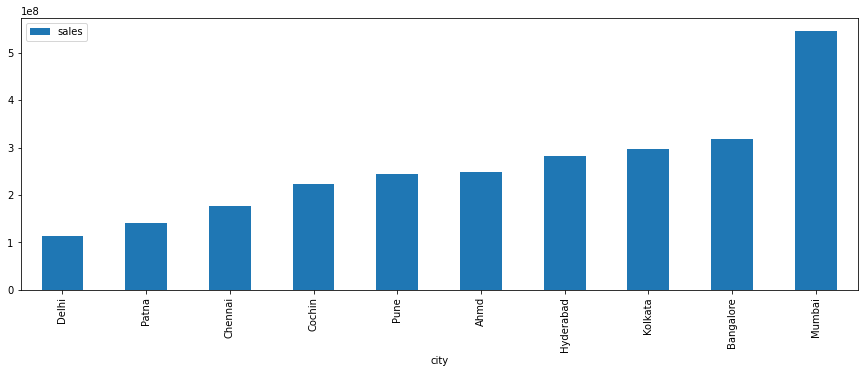

In [36]:
df.groupby(by=['city'])['sales'].sum().reset_index().sort_values(['sales']).tail(10).plot(x='city',
                                                                                                           y='sales',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

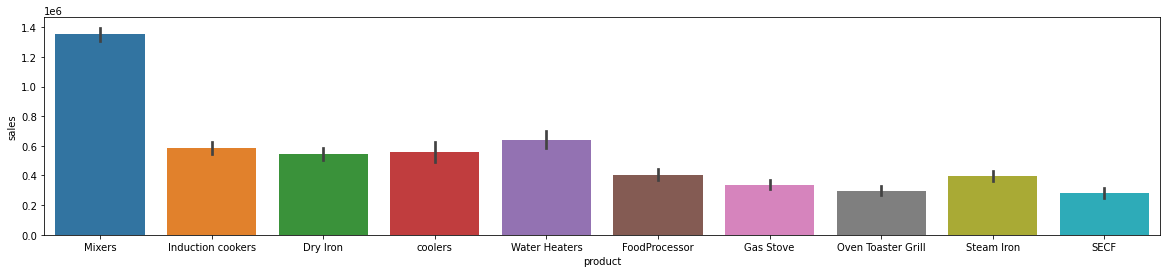

In [37]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="product", y="sales", data=df)

In [38]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x="city", y="sales", data=df)

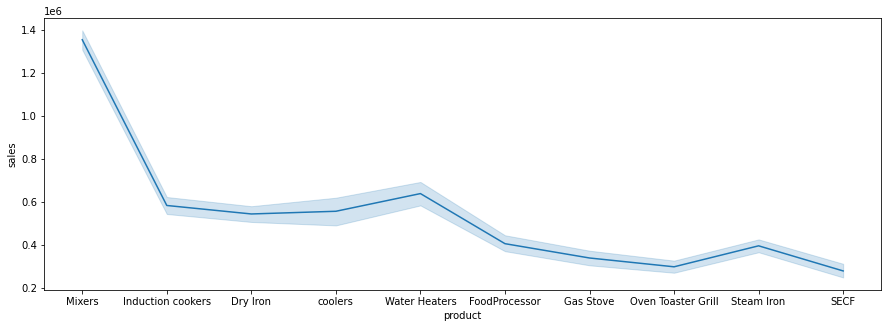

In [39]:
#Here we plotting a line plot. This code might take some time to execute. 
plt.figure(figsize=(15,5))
sns.lineplot(x='product',y='sales', data=df )
plt.show()

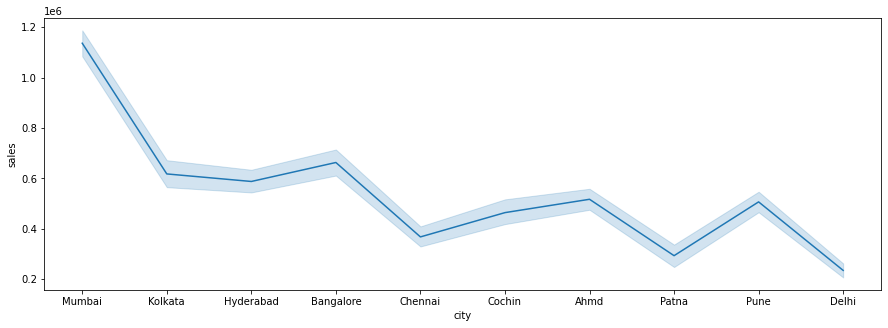

In [40]:
#Here we plotting a line plot. This code might take some time to execute. 
plt.figure(figsize=(15,5))
sns.lineplot(x='city',y='sales', data=df )
plt.show()

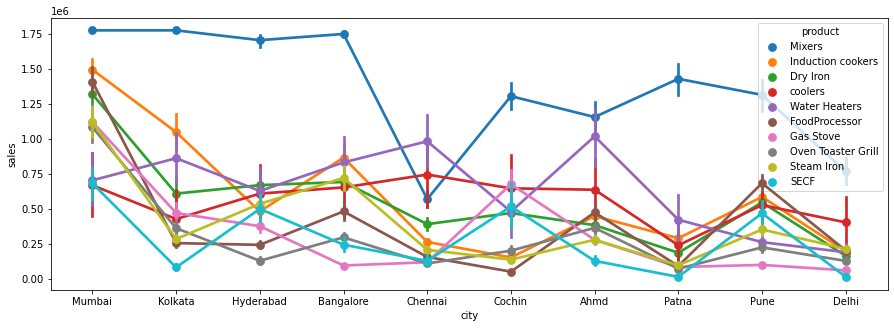

In [41]:
plt.figure(figsize=(15,5))

sns.pointplot(x="city", y="sales", hue = 'product',  data=df)
plt.show()


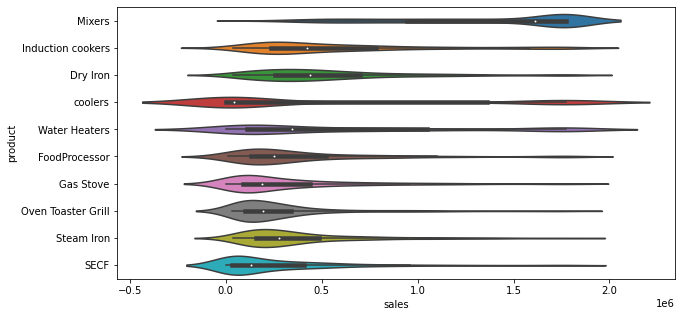

In [42]:
plt.figure(figsize=(10,5))
sns.violinplot(x=df.sales, y=df['product'])
plt.show()


In [43]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='city',y='sales',hue='product')
plt.show()

In [44]:
import seaborn as sns

sns.pairplot(df, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

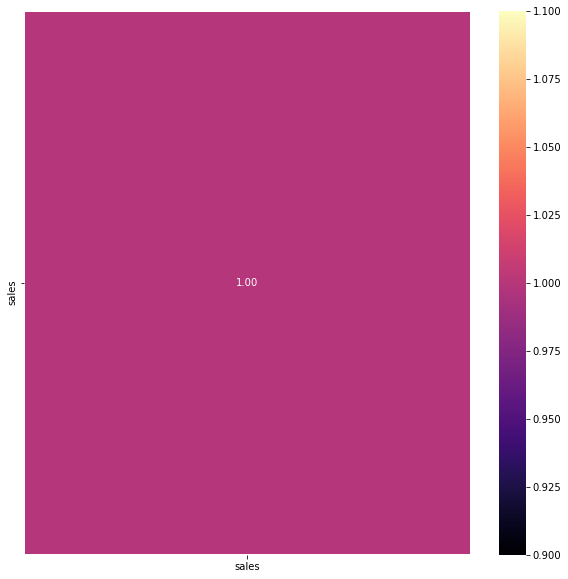

In [45]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

In [46]:
df.cov()

sales
sales  3.134971e+11

In [47]:
df.corr()

sales
sales    1.0

In [49]:
df['sales'] = np.log(df['sales']+1)

In [66]:
df=df.rename(columns={'sales':'log_sales'})
df

product    city  log_sales
date                                 
2014-04-01  Mixers  Mumbai  14.801084
2014-05-01  Mixers  Mumbai  15.167372
2014-06-01  Mixers  Mumbai  14.891420
2014-07-01  Mixers  Mumbai  15.124847
2014-08-01  Mixers  Mumbai  15.184412
...            ...     ...        ...
2017-11-01    SECF   Delhi   8.672144
2017-12-01    SECF   Delhi   8.916238
2018-01-01    SECF   Delhi   8.950662
2018-02-01    SECF   Delhi  10.358568
2018-03-01    SECF   Delhi  10.495073

[4800 rows x 3 columns]

## Modelling

In [48]:
df = pd.read_csv('data_t10.csv',parse_dates=['date'],index_col='date')
df.head()

product    city    sales
date                               
2014-04-01  Mixers  Mumbai  2679347
2014-05-01  Mixers  Mumbai  3864612
2014-06-01  Mixers  Mumbai  2932658
2014-07-01  Mixers  Mumbai  3703713
2014-08-01  Mixers  Mumbai  3931029

In [67]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

In [68]:
df.groupby('product').count()

city  log_sales
product                            
Dry Iron             480        480
FoodProcessor        480        480
Gas Stove            480        480
Induction cookers    480        480
Mixers               480        480
Oven Toaster Grill   480        480
SECF                 480        480
Steam Iron           480        480
Water Heaters        480        480
coolers              480        480

In [69]:
df_WaterHeaters =  df[df['product'] == 'Water Heaters']
df_Mixers =  df[df['product'] == 'Mixers']
df_coolers =  df[df['product'] == 'coolers']

In [70]:
df_Mumbai =  df[df['city'] == 'Mumbai']
df_Kolkata =  df[df['city'] == 'Kolkata']
df_Bangalore =  df[df['city'] == 'Bangalore']

## Building model on top 3 products :Mixers,Induction Cookers

## MIXERS

In [71]:
df_m=df_Mixers.groupby(['date']).sum()
df_m.head(10)

log_sales
date                  
2014-04-01  137.957736
2014-05-01  141.620614
2014-06-01  138.861098
2014-07-01  141.195360
2014-08-01  141.791017
2014-09-01  143.528587
2014-10-01  142.761514
2014-11-01  135.916933
2014-12-01  142.289321
2015-01-01  142.074228

In [72]:
df_m.plot();
plt.grid()

In [73]:
### Decompose

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_m,model='addictive')
decomposition.plot();


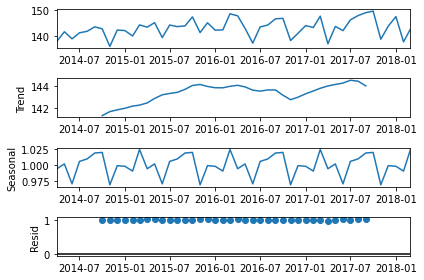

In [74]:
### Decompose

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_m,model='multiplicative')
decomposition.plot();

In [75]:
train_m=df_m.loc['2014-01-01':'2016-12-31']
test_m=df_m.loc['2017-01-01':'2018-12-31']

In [76]:
print(train_m.shape)
print(test_m.shape)

(33, 1)
(15, 1)


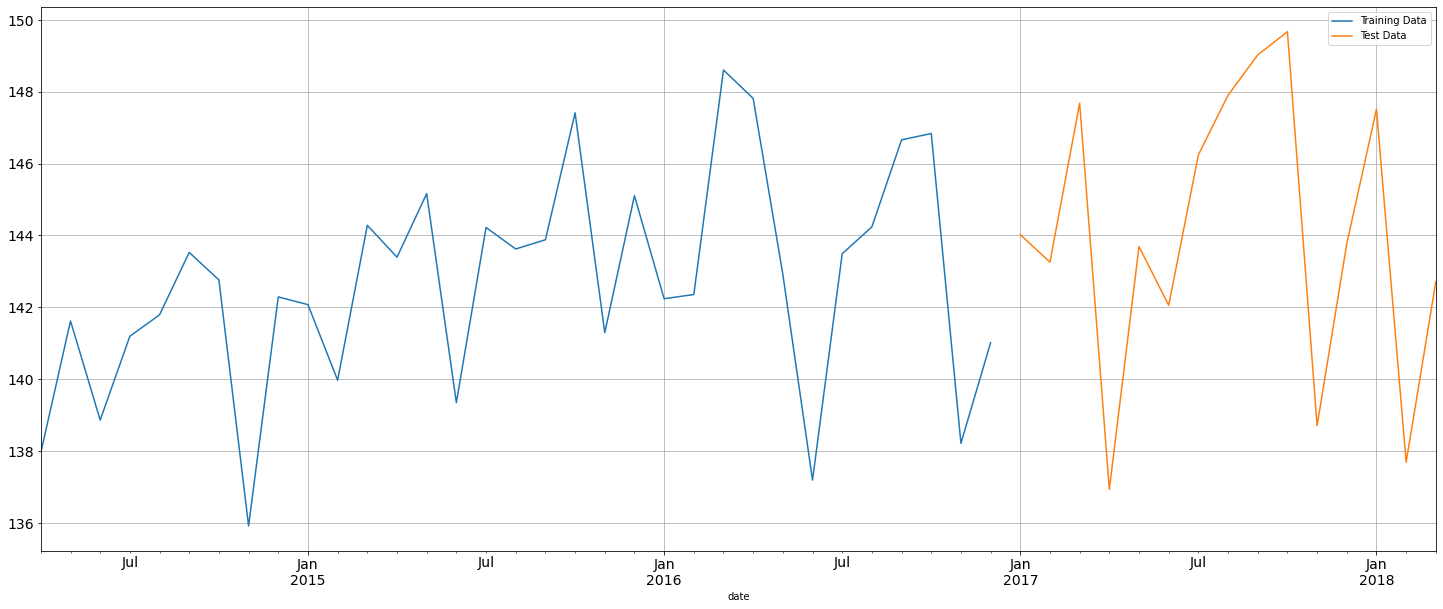

In [77]:
train_m['log_sales'].plot(figsize=(25,10), fontsize=14, kind="line")
test_m['log_sales'].plot(figsize=(25,10), fontsize=14,kind="line")
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [78]:
print('First few rows of Training Data','\n',train_m.head(),'\n')
print('Last few rows of Training Data','\n',train_m.tail(),'\n')
print('First few rows of Test Data','\n',test_m.head(),'\n')
print('Last few rows of Test Data','\n',test_m.tail(),'\n')

First few rows of Training Data 
              log_sales
date                  
2014-04-01  137.957736
2014-05-01  141.620614
2014-06-01  138.861098
2014-07-01  141.195360
2014-08-01  141.791017 

Last few rows of Training Data 
              log_sales
date                  
2016-08-01  144.239225
2016-09-01  146.660614
2016-10-01  146.837191
2016-11-01  138.216046
2016-12-01  141.014021 

First few rows of Test Data 
              log_sales
date                  
2017-01-01  144.021659
2017-02-01  143.256759
2017-03-01  147.681491
2017-04-01  136.933077
2017-05-01  143.691133 

Last few rows of Test Data 
              log_sales
date                  
2017-11-01  138.705884
2017-12-01  143.770041
2018-01-01  147.512132
2018-02-01  137.688390
2018-03-01  142.713484 



In [79]:
train_time_m = [i+1 for i in range(len(train_m))]
test_time_m = [i+34 for i in range(len(test_m))]
print('Training Time instance','\n',train_time_m)
print('Test Time instance','\n',test_time_m)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Test Time instance 
 [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]


## LINEAR REGRESSION

In [80]:
LinearRegression_train_m = train_m.copy()
LinearRegression_test_m = test_m.copy()


In [81]:
LinearRegression_train_m['time'] = train_time_m
LinearRegression_test_m['time'] = test_time_m

In [82]:
print('First few rows of Training Data','\n',LinearRegression_train_m.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train_m.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test_m.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test_m.tail(),'\n')

First few rows of Training Data 
              log_sales  time
date                        
2014-04-01  137.957736     1
2014-05-01  141.620614     2
2014-06-01  138.861098     3
2014-07-01  141.195360     4
2014-08-01  141.791017     5 

Last few rows of Training Data 
              log_sales  time
date                        
2016-08-01  144.239225    29
2016-09-01  146.660614    30
2016-10-01  146.837191    31
2016-11-01  138.216046    32
2016-12-01  141.014021    33 

First few rows of Test Data 
              log_sales  time
date                        
2017-01-01  144.021659    34
2017-02-01  143.256759    35
2017-03-01  147.681491    36
2017-04-01  136.933077    37
2017-05-01  143.691133    38 

Last few rows of Test Data 
              log_sales  time
date                        
2017-11-01  138.705884    44
2017-12-01  143.770041    45
2018-01-01  147.512132    46
2018-02-01  137.688390    47
2018-03-01  142.713484    48 



In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lr = LinearRegression()

In [85]:
lr.fit(LinearRegression_train_m[['time']],LinearRegression_train_m['log_sales'].values)

LinearRegression()

In [86]:
test_predictions_model_1 = lr.predict(LinearRegression_test_m[['time']])
LinearRegression_test_m['RegOnTime'] = test_predictions_model_1


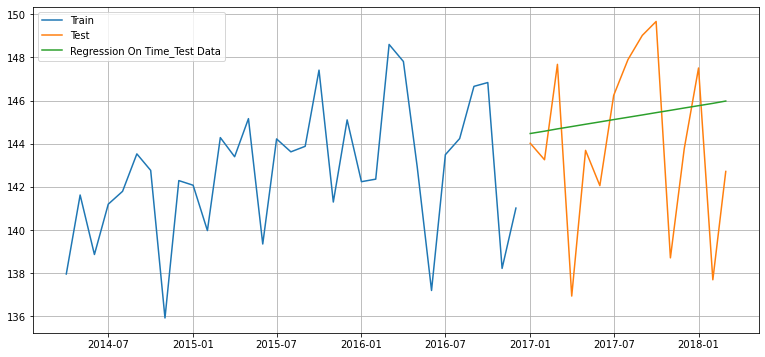

In [87]:
plt.figure(figsize=(13,6))
plt.plot( train_m['log_sales'], label='Train')
plt.plot(test_m['log_sales'], label='Test')
plt.plot(LinearRegression_test_m['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Defining the accuracy metrics.

In [88]:
from sklearn import metrics

### Model Evaluation

In [90]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test_m['log_sales'],test_predictions_model_1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))


For RegressionOnTime forecast on the Test Data,  RMSE is 4.115


In [91]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime   4.114513

## Check for stationarity of the Training Data Time Series.

In [92]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

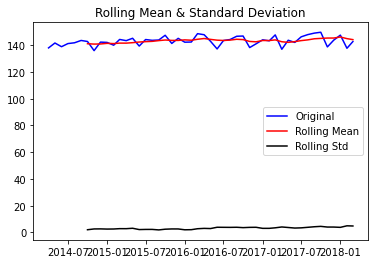

Results of Dickey-Fuller Test:
Test Statistic                -6.421530e+00
p-value                        1.786575e-08
#Lags Used                     0.000000e+00
Number of Observations Used    4.700000e+01
Critical Value (1%)           -3.577848e+00
Critical Value (5%)           -2.925338e+00
Critical Value (10%)          -2.600774e+00
dtype: float64 



In [93]:
test_stationarity(df_m['log_sales'])

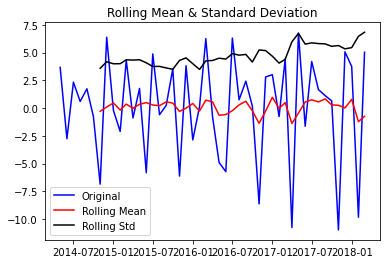

Results of Dickey-Fuller Test:
Test Statistic                 -3.274096
p-value                         0.016077
#Lags Used                     10.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64 



In [94]:
test_stationarity(df_m['log_sales'].diff().dropna())

## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [95]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0,2)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (1, 1, 0)
Model: (1, 1, 1)


In [96]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [97]:
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    ARIMA_model = ARIMA(train_m['log_sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 0) - AIC:182.7717320390559
ARIMA(0, 1, 1) - AIC:168.16894786513075
ARIMA(1, 1, 0) - AIC:179.53411819285452
ARIMA(1, 1, 1) - AIC:170.06105439599486


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [98]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param         AIC
1  (0, 1, 1)  168.168948
3  (1, 1, 1)  170.061054
2  (1, 1, 0)  179.534118
0  (0, 1, 0)  182.771732

In [99]:
auto_ARIMA = ARIMA(train_m['log_sales'], order=(0,1,1))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.log_sales   No. Observations:                   32
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -81.084
Method:                       css-mle   S.D. of innovations              2.887
Date:                Wed, 08 Sep 2021   AIC                            168.169
Time:                        12:32:09   BIC                            172.566
Sample:                    05-01-2014   HQIC                           169.626
                         - 12-01-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1076      0.053      2.038      0.042       0.004       0.211
ma.L1.D.log_sales    -0.9999      0.116     -8.585      0.000      -1.228      -0.772
                        

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

## Predict on the Test Set using this model and evaluate the model.

In [101]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(df_m))

In [102]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(df_m['log_sales'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

5.183288399951223


In [103]:
resultsDf_autoarima = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,1)'])

resultsDf=pd.concat([resultsDf_autoarima,resultsDf])

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [104]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

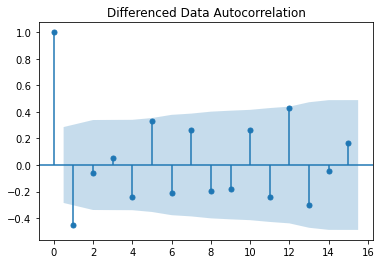

In [109]:
plot_acf(df_m['log_sales'].diff().dropna(),lags=15,title='Differenced Data Autocorrelation')
plt.show()

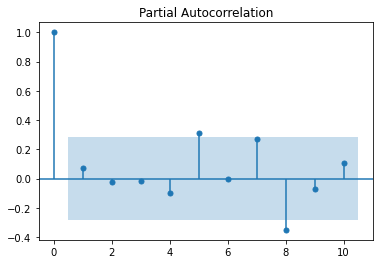

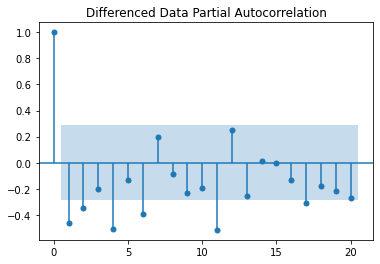

In [113]:
plot_pacf(df_m['log_sales'],lags=10)
plot_pacf(df_m['log_sales'].diff().dropna(),lags=20,title='Differenced Data Partial Autocorrelation')
plt.show()

## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

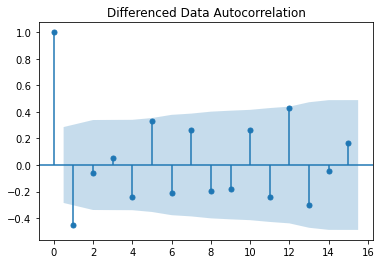

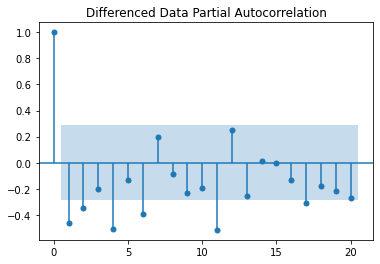

In [115]:
plot_acf(df_m['log_sales'].diff().dropna(),lags=15,title='Differenced Data Autocorrelation')
plot_pacf(df_m['log_sales'].diff().dropna(),lags=20,title='Differenced Data Partial Autocorrelation')
plt.show()

## MANUAL ARIMA

In [117]:
manual_ARIMA = ARIMA(train_m['log_sales'].astype('float64'), order=(4,1,2)) #order = (p=0,d=1,q=0)

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

                             ARIMA Model Results                              
Dep. Variable:            D.log_sales   No. Observations:                   32
Model:                 ARIMA(4, 1, 2)   Log Likelihood                 -74.386
Method:                       css-mle   S.D. of innovations              2.321
Date:                Wed, 08 Sep 2021   AIC                            164.772
Time:                        15:54:05   BIC                            176.498
Sample:                    05-01-2014   HQIC                           168.659
                         - 12-01-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1039      0.073      1.428      0.153      -0.039       0.247
ar.L1.D.log_sales    -0.8817      0.160     -5.494      0.000      -1.196      -0.567
ar.L2.D.log_sales    -0.

## Predict on the Test Set using this model and evaluate the model.

In [118]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_m))

In [119]:
rmse = mean_squared_error(test_m['log_sales'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

3.5928078573660565


In [120]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(4,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
ARIMA(0,1,1)       5.183288
RegressionOnTime   4.114513
ARIMA(4,1,2)       3.592808

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

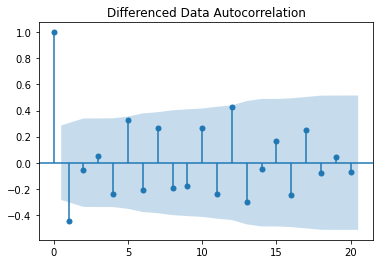

In [122]:
plot_acf(df_m['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 1 as well as 12. We will run our auto SARIMA models by setting seasonality both as 1 and 12.

### Setting the seasonality as 1 for the first iteration of the auto SARIMA model.

In [123]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p,d,q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [124]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [125]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_m['log_sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:92.78080906870169
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:31.883931080303732
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:6.0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:44.21267735772594
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:33.883947812407996
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:8.0
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:6.0
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:8.0
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:10.0
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:89.16832941020726
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:24.7336705048005
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:8.0
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:44.59027206544593
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:29.79952721387862
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:10.0
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:8.0
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:10.0
SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:12.0
SARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:82.29693238604148
SARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC:24.362334192008696
SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:10.0
SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:46.09749673416477
SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:24.77039866425502
SARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:12.0
SARIMA(0, 1, 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:28.38045655137894
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:22.097848129254956
SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:16.0
SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:14.0
SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:16.0
SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:18.0


In [126]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal  AIC
2   (0, 1, 0)  (0, 1, 2, 12)  6.0
6   (0, 1, 0)  (2, 1, 0, 12)  6.0
11  (0, 1, 1)  (0, 1, 2, 12)  8.0
33  (1, 1, 0)  (2, 1, 0, 12)  8.0
5   (0, 1, 0)  (1, 1, 2, 12)  8.0

In [132]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_m['log_sales'].values,
                                order=(0, 1, 0),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                   33
Model:             SARIMAX(0, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                 -47.528
Date:                                 Wed, 08 Sep 2021   AIC                            101.055
Time:                                         16:08:33   BIC                            104.042
Sample:                                              0   HQIC                           101.638
                                                  - 33                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.0382   1940.941  -1.97e-05      1.000   -3804.213    3804

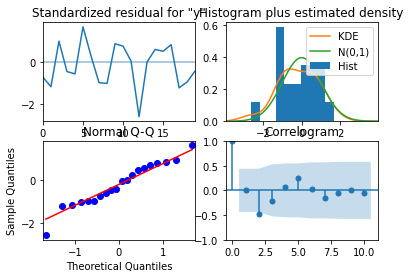

In [133]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [134]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test_m))

In [135]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean   mean_se  mean_ci_lower  mean_ci_upper
0  138.248858  2.603905     133.145299     143.352418
1  138.281532  3.682477     131.064009     145.499055
2  144.456563  4.510095     135.616938     153.296187
3  143.661563  5.207809     133.454444     153.868682
4  139.024073  5.822503     127.612177     150.435970

In [136]:
rmse = mean_squared_error(test_m['log_sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

6.5889196696678205


In [137]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,1)(0,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
ARIMA(0,1,1)              5.183288
RegressionOnTime          4.114513
ARIMA(4,1,2)              3.592808
SARIMA(0,1,1)(0,1,2,12)   6.588920

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.

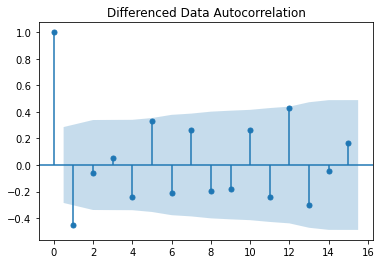

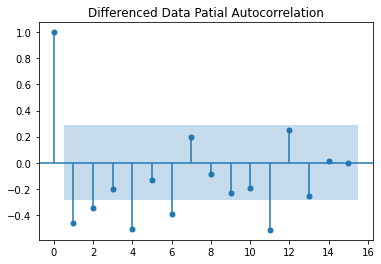

In [141]:
plot_acf(df_m['log_sales'].diff().dropna(),lags=15,title='Differenced Data Autocorrelation')
plot_pacf(df_m['log_sales'].diff().dropna(),lags=15,title='Differenced Data Patial Autocorrelation')
plt.show()

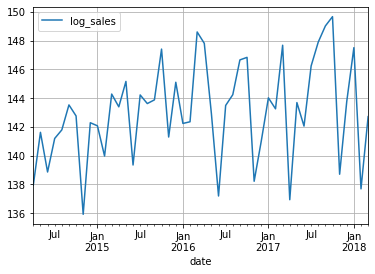

In [143]:
df_m.plot()
plt.grid();

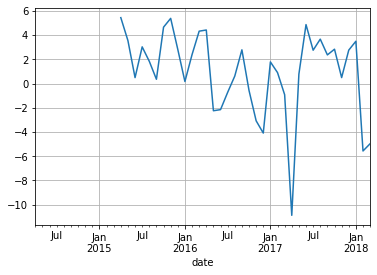

In [144]:
(df_m['log_sales'].diff(12)).plot()
plt.grid();

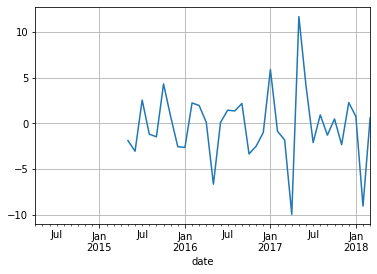

In [145]:
(df_m['log_sales'].diff(12)).diff().plot()
plt.grid();

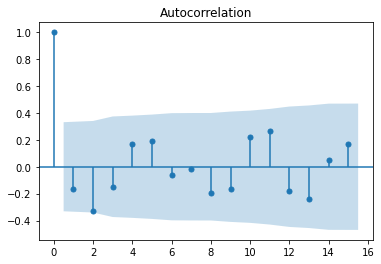

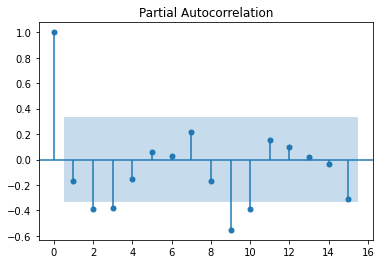

In [146]:
plot_acf((df_m['log_sales'].diff(12).dropna()).diff().dropna(),lags=15)
plot_pacf((df_m['log_sales'].diff(12).dropna()).diff().dropna(),lags=15);

In [147]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_m['log_sales'].values,
                                order=(4,1,2),
                                seasonal_order=(0,1,1,12),
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   33
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood                 -41.866
Date:                              Wed, 08 Sep 2021   AIC                             99.732
Time:                                      16:18:25   BIC                            107.697
Sample:                                           0   HQIC                           101.287
                                               - 33                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4992      0.960      0.520      0.603      -1.383       2.382
ar.L2         -1.26

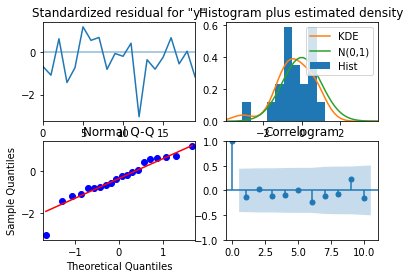

In [148]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [149]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test_m))

In [150]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean   mean_se  mean_ci_lower  mean_ci_upper
0  141.735794  1.744449     138.316736     145.154851
1  143.878155  2.039798     139.880226     147.876085
2  148.176981  2.025545     144.206986     152.146976
3  144.524277  2.118704     140.371693     148.676860
4  140.908430  2.427447     136.150721     145.666140

In [151]:
rmse = mean_squared_error(test_m['log_sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

3.8387661889353155


In [152]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(4,1,2)(0,1,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
ARIMA(0,1,1)              5.183288
RegressionOnTime          4.114513
ARIMA(4,1,2)              3.592808
SARIMA(0,1,1)(0,1,2,12)   6.588920
SARIMA(4,1,2)(0,1,1,12)   3.838766

In [153]:
resultsDf.sort_values('Test RMSE',ascending=True)

Test RMSE
ARIMA(4,1,2)              3.592808
SARIMA(4,1,2)(0,1,1,12)   3.838766
RegressionOnTime          4.114513
ARIMA(0,1,1)              5.183288
SARIMA(0,1,1)(0,1,2,12)   6.588920

Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [155]:
TES_train = train_m.copy()
TES_test = test_m.copy()

In [157]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [158]:
model_TES = ExponentialSmoothing(TES_train['log_sales'],trend='additive',seasonal='multiplicative')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [159]:
model_TES_autofit = model_TES.fit()

In [160]:
model_TES_autofit.params

{'smoothing_level': 0.23769040164030875,
 'smoothing_trend': 0.23769040164030875,
 'smoothing_seasonal': 0.7623095983596913,
 'damping_trend': nan,
 'initial_level': 138.08873156044694,
 'initial_trend': 0.25958407140113565,
 'initial_seasons': array([0.99717642, 1.01771124, 0.99677102, 1.01651157, 1.01830019,
        1.02996261, 1.02667905, 0.97379784, 1.01387239, 1.0108558 ,
        0.99804137, 1.0264873 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [161]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test_m))
TES_test.head()

log_sales  auto_predict
date                                
2017-01-01  144.021659    139.970430
2017-02-01  143.256759    139.664174
2017-03-01  147.681491    144.924523
2017-04-01  136.933077    143.100945
2017-05-01  143.691133    138.844289

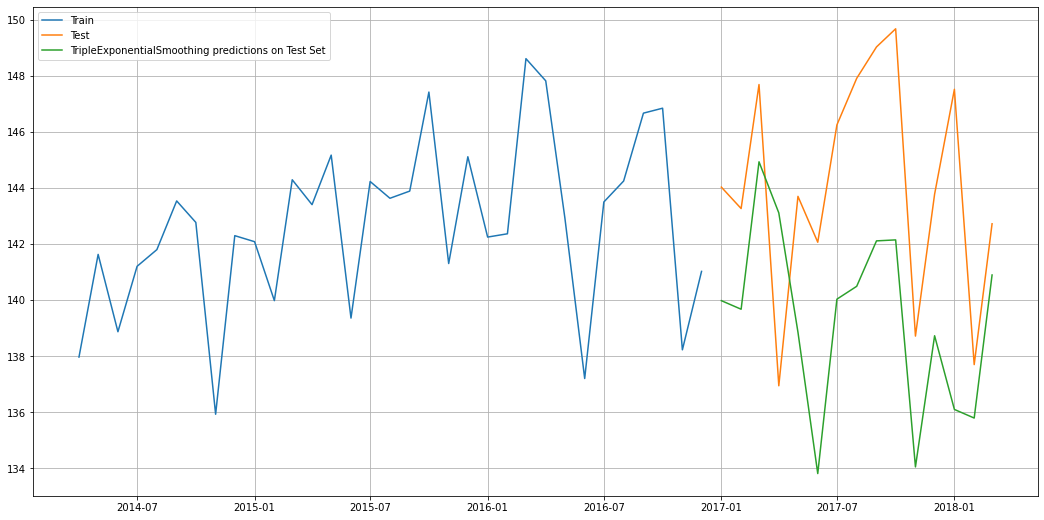

In [162]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['log_sales'], label='Train')
plt.plot(TES_test['log_sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [164]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['log_sales'],TES_test['auto_predict'],squared=False)
print("Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 6.054


In [165]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
ARIMA(0,1,1)                 5.183288
RegressionOnTime             4.114513
ARIMA(4,1,2)                 3.592808
SARIMA(0,1,1)(0,1,2,12)      6.588920
SARIMA(4,1,2)(0,1,1,12)      3.838766
TripleExponentialSmoothing   6.053824

In [166]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [167]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test_m))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['log_sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['log_sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [168]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
0             0.1          0.1           0.1    2.312655   2.934743
1             0.1          0.1           0.2    2.267657   3.079150
2             0.1          0.1           0.3    2.231097   3.234237
3             0.1          0.1           0.4    2.203537   3.392384
4             0.1          0.1           0.5    2.185482   3.548821
..            ...          ...           ...         ...        ...
724           0.9          0.9           0.5    3.132360  13.122640
725           0.9          0.9           0.6    3.224472   9.177213
726           0.9          0.9           0.7    3.393470   5.903086
727           0.9          0.9           0.8    3.628805   5.041403
728           0.9          0.9           0.9    3.918716   7.591925

[729 rows x 5 columns]

In [169]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
9            0.1          0.2           0.1    2.316884   2.855566
0            0.1          0.1           0.1    2.312655   2.934743
81           0.2          0.1           0.1    2.310708   2.978283
10           0.1          0.2           0.2    2.273336   3.048952
1            0.1          0.1           0.2    2.267657   3.079150

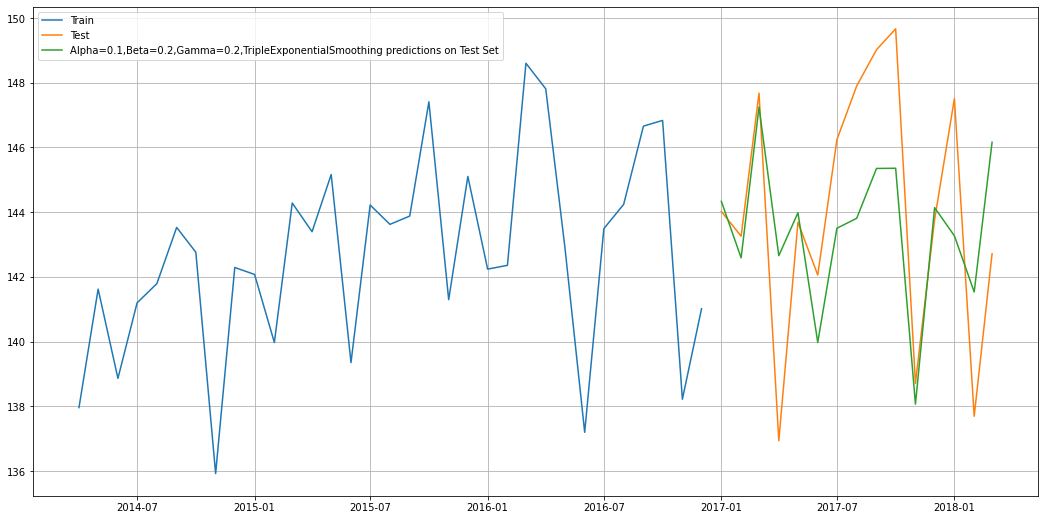

In [170]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['log_sales'], label='Train')
plt.plot(TES_test['log_sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [171]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
ARIMA(0,1,1)                                         5.183288
RegressionOnTime                                     4.114513
ARIMA(4,1,2)                                         3.592808
SARIMA(0,1,1)(0,1,2,12)                              6.588920
SARIMA(4,1,2)(0,1,1,12)                              3.838766
TripleExponentialSmoothing                           6.053824
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   2.855566

In [172]:
resultsDf.sort_values('Test RMSE',ascending=True)

Test RMSE
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   2.855566
ARIMA(4,1,2)                                         3.592808
SARIMA(4,1,2)(0,1,1,12)                              3.838766
RegressionOnTime                                     4.114513
ARIMA(0,1,1)                                         5.183288
TripleExponentialSmoothing                           6.053824
SARIMA(0,1,1)(0,1,2,12)                              6.588920

## MUMBAI

In [173]:
df_M=df_Mumbai.groupby(['date']).sum()
df_M.head(10)

log_sales
date                  
2014-04-01  134.479061
2014-05-01  138.708688
2014-06-01  134.151066
2014-07-01  125.822084
2014-08-01  126.111952
2014-09-01  127.523627
2014-10-01  136.812480
2014-11-01  132.829432
2014-12-01  137.884690
2015-01-01  139.642293

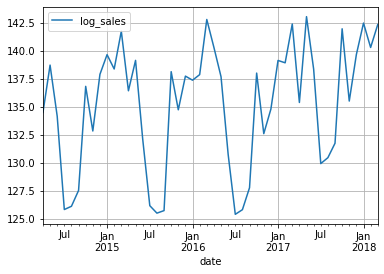

In [174]:
df_M.plot();
plt.grid()

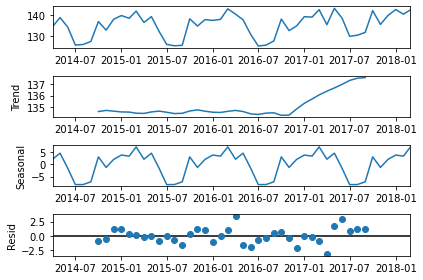

In [175]:
### Decompose

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_M,model='addictive')
decomposition.plot();


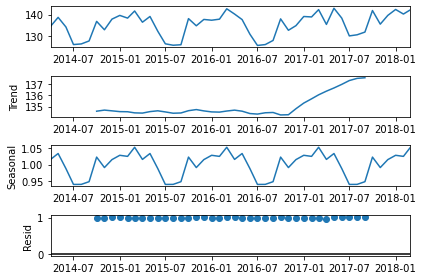

In [176]:
### Decompose

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_M,model='multiplicative')
decomposition.plot();


In [177]:
train_M=df_M.loc['2014-01-01':'2016-12-31']
test_M=df_M.loc['2017-01-01':'2018-12-31']

In [178]:
print(train_M.shape)
print(test_M.shape)

(33, 1)
(15, 1)


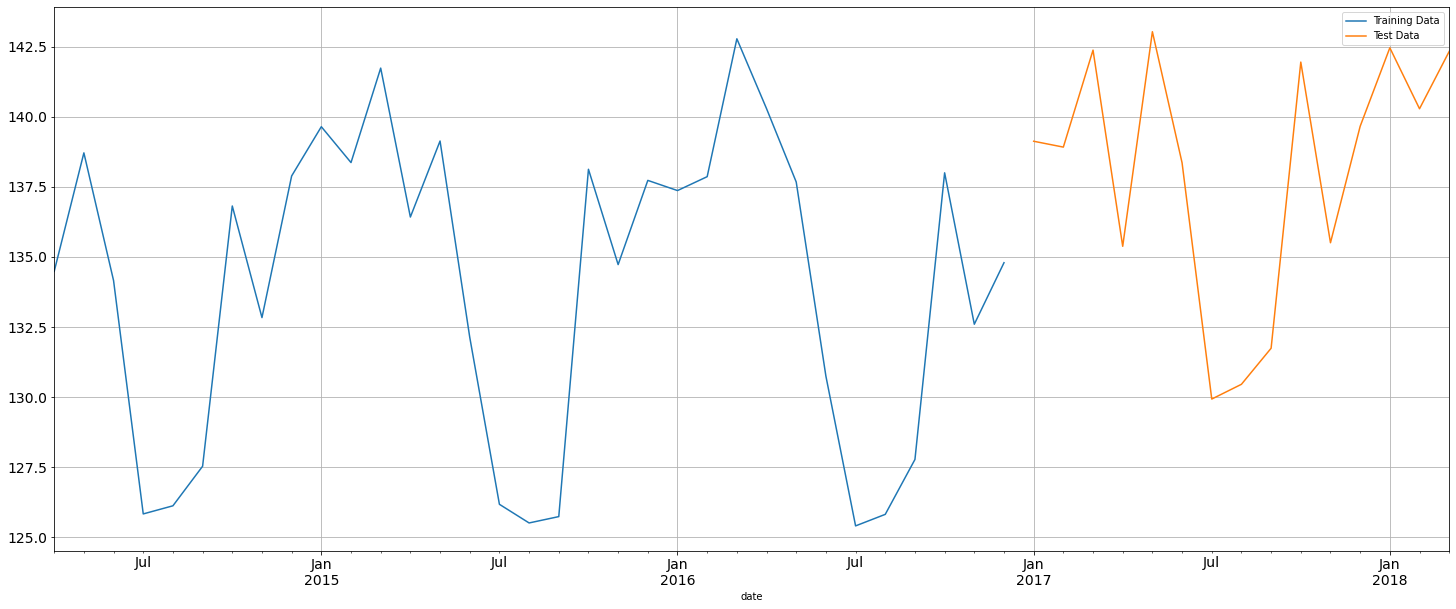

In [179]:
train_M['log_sales'].plot(figsize=(25,10), fontsize=14, kind="line")
test_M['log_sales'].plot(figsize=(25,10), fontsize=14,kind="line")
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [180]:
print('First few rows of Training Data','\n',train_M.head(),'\n')
print('Last few rows of Training Data','\n',train_M.tail(),'\n')
print('First few rows of Test Data','\n',test_M.head(),'\n')
print('Last few rows of Test Data','\n',test_M.tail(),'\n')

First few rows of Training Data 
              log_sales
date                  
2014-04-01  134.479061
2014-05-01  138.708688
2014-06-01  134.151066
2014-07-01  125.822084
2014-08-01  126.111952 

Last few rows of Training Data 
              log_sales
date                  
2016-08-01  125.806692
2016-09-01  127.765417
2016-10-01  137.996442
2016-11-01  132.592202
2016-12-01  134.787940 

First few rows of Test Data 
              log_sales
date                  
2017-01-01  139.123727
2017-02-01  138.914264
2017-03-01  142.376001
2017-04-01  135.373530
2017-05-01  143.033135 

Last few rows of Test Data 
              log_sales
date                  
2017-11-01  135.500924
2017-12-01  139.656433
2018-01-01  142.458933
2018-02-01  140.283417
2018-03-01  142.329351 



In [181]:
train_time_M = [i+1 for i in range(len(train_M))]
test_time_M = [i+34 for i in range(len(test_M))]
print('Training Time instance','\n',train_time_M)
print('Test Time instance','\n',test_time_M)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Test Time instance 
 [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]


## LINEAR REGRESSION

In [200]:
LinearRegression_train_M = train_M.copy()
LinearRegression_test_M = test_M.copy()

In [201]:
LinearRegression_train_M['time'] = train_time_M
LinearRegression_test_M['time'] = test_time_M

In [202]:
print('First few rows of Training Data','\n',LinearRegression_train_M.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train_M.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test_M.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test_M.tail(),'\n')

First few rows of Training Data 
              log_sales  time
date                        
2014-04-01  134.479061     1
2014-05-01  138.708688     2
2014-06-01  134.151066     3
2014-07-01  125.822084     4
2014-08-01  126.111952     5 

Last few rows of Training Data 
              log_sales  time
date                        
2016-08-01  125.806692    29
2016-09-01  127.765417    30
2016-10-01  137.996442    31
2016-11-01  132.592202    32
2016-12-01  134.787940    33 

First few rows of Test Data 
              log_sales  time
date                        
2017-01-01  139.123727    34
2017-02-01  138.914264    35
2017-03-01  142.376001    36
2017-04-01  135.373530    37
2017-05-01  143.033135    38 

Last few rows of Test Data 
              log_sales  time
date                        
2017-11-01  135.500924    44
2017-12-01  139.656433    45
2018-01-01  142.458933    46
2018-02-01  140.283417    47
2018-03-01  142.329351    48 



In [203]:
from sklearn.linear_model import LinearRegression

In [204]:
lr = LinearRegression()

In [205]:
lr.fit(LinearRegression_train_M[['time']],LinearRegression_train_M['log_sales'].values)

LinearRegression()

In [206]:
test_predictions_model_1 = lr.predict(LinearRegression_test_M[['time']])
LinearRegression_test_M['RegOnTime'] = test_predictions_model_1


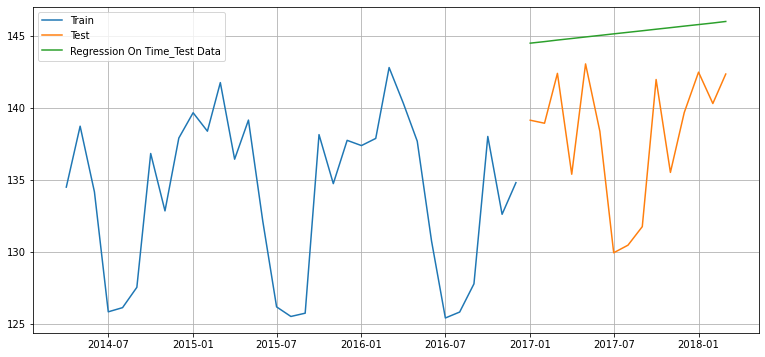

In [207]:
plt.figure(figsize=(13,6))
plt.plot( train_M['log_sales'], label='Train')
plt.plot(test_M['log_sales'], label='Test')
plt.plot(LinearRegression_test_m['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Defining the accuracy metrics.

In [208]:
from sklearn import metrics

### Model Evaluation

In [209]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test_M['log_sales'],test_predictions_model_1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))


For RegressionOnTime forecast on the Test Data,  RMSE is 6.184


In [210]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime   6.184009

## Check for stationarity of the Training Data Time Series.

In [211]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

 ## Perform Dickey-Fuller test:


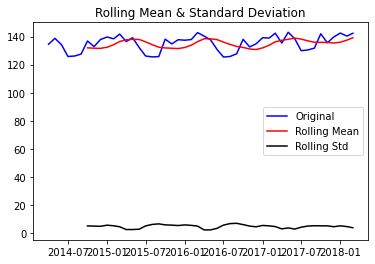

Results of Dickey-Fuller Test:
Test Statistic                 -0.074393
p-value                         0.951930
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64 



In [212]:
test_stationarity(df_M['log_sales'])

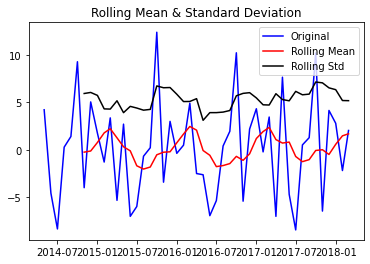

Results of Dickey-Fuller Test:
Test Statistic                -6.175271e+00
p-value                        6.654069e-08
#Lags Used                     1.000000e+01
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64 



In [213]:
test_stationarity(df_M['log_sales'].diff().dropna())

## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [214]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0,2)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (1, 1, 0)
Model: (1, 1, 1)


In [215]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [216]:
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    ARIMA_model = ARIMA(train_M['log_sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 0) - AIC:198.04947071024603
ARIMA(0, 1, 1) - AIC:199.78546562917245
ARIMA(1, 1, 0) - AIC:199.74705813253507
ARIMA(1, 1, 1) - AIC:201.50492288526456


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [217]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param         AIC
0  (0, 1, 0)  198.049471
2  (1, 1, 0)  199.747058
1  (0, 1, 1)  199.785466
3  (1, 1, 1)  201.504923

In [218]:
auto_ARIMA = ARIMA(train_M['log_sales'], order=(0,1,0))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.log_sales   No. Observations:                   32
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -97.025
Method:                           css   S.D. of innovations              5.018
Date:                Wed, 08 Sep 2021   AIC                            198.049
Time:                        18:30:33   BIC                            200.981
Sample:                    05-01-2014   HQIC                           199.021
                         - 12-01-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0097      0.887      0.011      0.991      -1.729       1.748


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

## Predict on the Test Set using this model and evaluate the model.

In [219]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(df_M))

In [220]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(df_M['log_sales'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

5.413197848520964


In [221]:
resultsDf_autoarima = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])

resultsDf=pd.concat([resultsDf_autoarima,resultsDf])

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [222]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

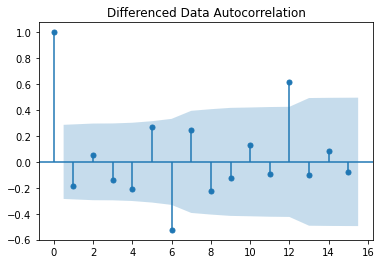

In [223]:
plot_acf(df_M['log_sales'].diff().dropna(),lags=15,title='Differenced Data Autocorrelation')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


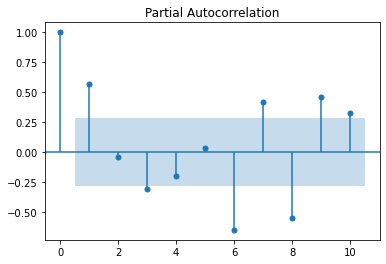

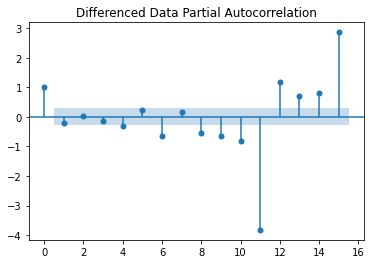

In [225]:
plot_pacf(df_M['log_sales'],lags=10)
plot_pacf(df_M['log_sales'].diff().dropna(),lags=15,title='Differenced Data Partial Autocorrelation')
plt.show()

## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


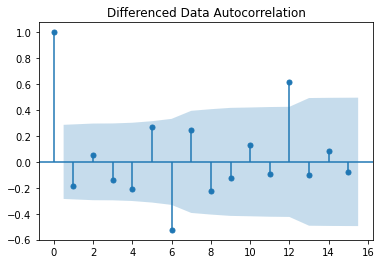

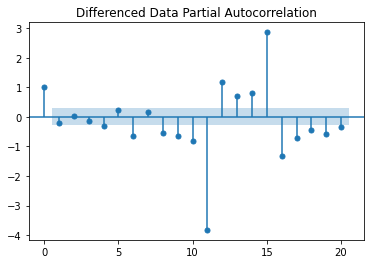

In [226]:
plot_acf(df_M['log_sales'].diff().dropna(),lags=15,title='Differenced Data Autocorrelation')
plot_pacf(df_M['log_sales'].diff().dropna(),lags=20,title='Differenced Data Partial Autocorrelation')
plt.show()

## MANUAL ARIMA

In [230]:
manual_ARIMA = ARIMA(train_M['log_sales'].astype('float64'), order=(0,1,2)) #order = (p=0,d=1,q=0)

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.log_sales   No. Observations:                   32
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 -96.731
Method:                       css-mle   S.D. of innovations              4.966
Date:                Wed, 08 Sep 2021   AIC                            201.462
Time:                        18:46:24   BIC                            207.325
Sample:                    05-01-2014   HQIC                           203.406
                         - 12-01-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0093      1.062     -0.009      0.993      -2.092       2.073
ma.L1.D.log_sales     0.0228      0.301      0.076      0.940      -0.567       0.613
ma.L2.D.log_sales     0.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

## Predict on the Test Set using this model and evaluate the model.

In [231]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_M))

In [232]:
rmse = mean_squared_error(test_M['log_sales'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

6.283640495276611


In [233]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
ARIMA(0,1,0)       5.413198
RegressionOnTime   6.184009
ARIMA(0,1,2)       6.283640

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

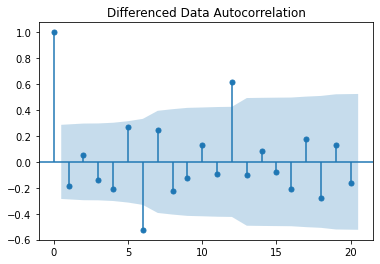

In [234]:
plot_acf(df_M['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

### Setting the seasonality as 12 for the first iteration of the auto SARIMA model.

In [235]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p,d,q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [236]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [237]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_M['log_sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:89.00089559460977
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:91.00087619673512
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:93.00087618996545
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:91.00087619310355
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:93.00087619465573


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:95.00087618906267
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:93.00087619093064
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:95.00087619209395
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:97.00087618620003
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:85.85647155953644
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:87.74089014589846
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:89.74088869051624
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:87.74089149086491
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:89.74089073041212
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:91.74088391134651
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:89.74089148629905
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:91.7408883754484
SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:93.74088390489148
SARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:85.39721137067001
SARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC:87.290270751737
SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:89.29027074909501
SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:87.29027203265933
SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:89.29027139419456
SARIMA(0, 1, 2)x(1, 1, 2, 12) -

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:88.7210574731833
SARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:90.71723958063346
SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:88.72125225101311
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:90.72115544947499
SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:92.71641980162201
SARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:90.7109399568312
SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:92.71103989673384
SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:94.71115391623199
SARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:87.22169947259987
SARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:89.11946233497923
SARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:91.11949623421137
SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:89.11943516031914
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:91.11944906423953
SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:93.11818386708342
SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:91.11704756051105
SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:93.11710140047862
SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:95.11723288797634
SARIMA(2, 1, 0)x(0, 1, 0, 12) - AIC:89.66615651145675
SARIMA(2, 1, 0)x(0, 1, 1, 12) 

In [238]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal        AIC
72  (2, 1, 2)  (0, 1, 0, 12)  79.493198
63  (2, 1, 1)  (0, 1, 0, 12)  83.206229
73  (2, 1, 2)  (0, 1, 1, 12)  83.915825
75  (2, 1, 2)  (1, 1, 0, 12)  83.916898
78  (2, 1, 2)  (2, 1, 0, 12)  84.500556

In [239]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_M['log_sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   33
Model:             SARIMAX(2, 1, 2)x(0, 1, [], 12)   Log Likelihood                 -34.747
Date:                             Wed, 08 Sep 2021   AIC                             79.493
Time:                                     19:01:39   BIC                             84.472
Sample:                                          0   HQIC                            80.465
                                              - 33                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5623      0.205      2.740      0.006       0.160       0.965
ar.L2         -0.7996      

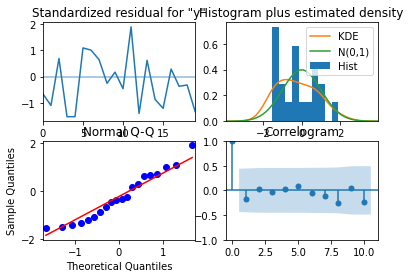

In [240]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [241]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test_M))

In [242]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean   mean_se  mean_ci_lower  mean_ci_upper
0  137.662278  1.197963     135.314314     140.010241
1  139.172756  1.198466     136.823806     141.521705
2  142.075344  1.286413     139.554021     144.596667
3  137.636321  1.293114     135.101863     140.170779
4  135.537223  1.591895     132.417167     138.657280

In [243]:
rmse = mean_squared_error(test_M['log_sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

4.608841519762114


In [244]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(2,1,2)(0,1,0,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
ARIMA(0,1,0)              5.413198
RegressionOnTime          6.184009
ARIMA(0,1,2)              6.283640
SARIMA(2,1,2)(0,1,0,12)   4.608842

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


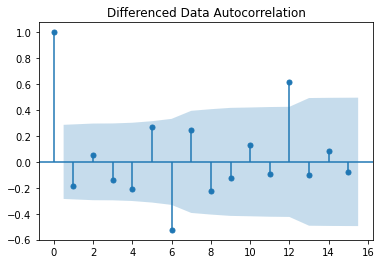

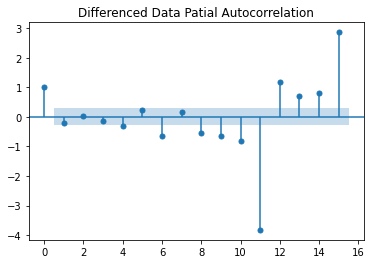

In [245]:
plot_acf(df_M['log_sales'].diff().dropna(),lags=15,title='Differenced Data Autocorrelation')
plot_pacf(df_M['log_sales'].diff().dropna(),lags=15,title='Differenced Data Patial Autocorrelation')
plt.show()

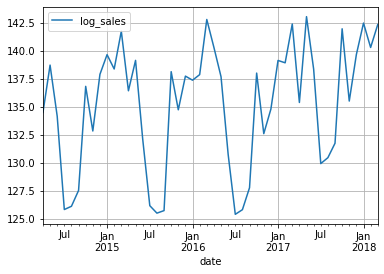

In [246]:
df_M.plot()
plt.grid();

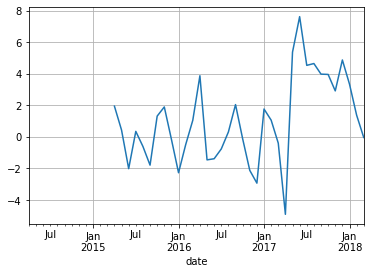

In [247]:
(df_M['log_sales'].diff(12)).plot()
plt.grid();

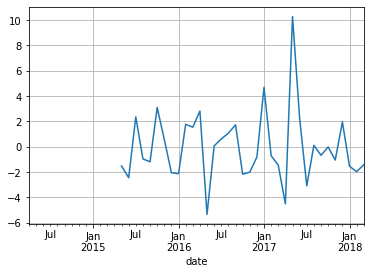

In [248]:
(df_M['log_sales'].diff(12)).diff().plot()
plt.grid();

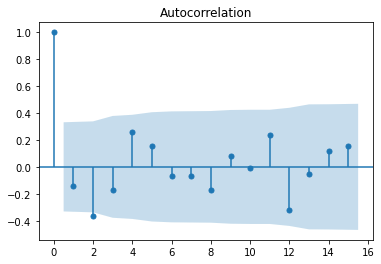

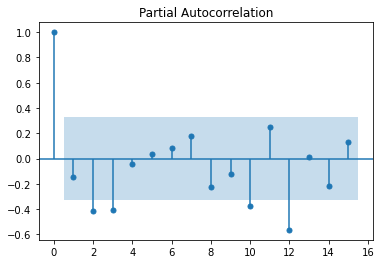

In [249]:
plot_acf((df_M['log_sales'].diff(12).dropna()).diff().dropna(),lags=15)
plot_pacf((df_M['log_sales'].diff(12).dropna()).diff().dropna(),lags=15);

In [250]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_M['log_sales'].values,
                                order=(0,1,1),
                                seasonal_order=(0,1,1,12),
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   33
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 -40.870
Date:                            Wed, 08 Sep 2021   AIC                             87.741
Time:                                    19:29:43   BIC                             90.728
Sample:                                         0   HQIC                            88.324
                                             - 33                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   3849.415     -0.000      1.000   -7545.714    7543.714
ma.S.L12       0.1116      0.371   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


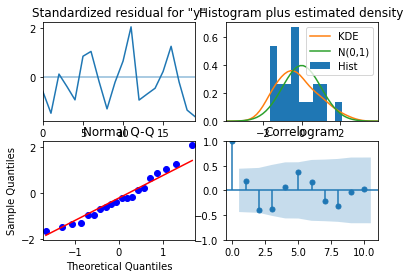

In [251]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [252]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test_M))

In [253]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean   mean_se  mean_ci_lower  mean_ci_upper
0  136.977912  1.764288     133.519971     140.435853
1  137.669921  1.764288     134.211980     141.127862
2  142.761584  1.764288     139.303643     146.219525
3  140.559450  1.765034     137.100046     144.018853
4  137.364444  1.765034     133.905040     140.823847

In [254]:
rmse = mean_squared_error(test_M['log_sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

4.343859028390953


In [255]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(0,1,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
ARIMA(0,1,0)              5.413198
RegressionOnTime          6.184009
ARIMA(0,1,2)              6.283640
SARIMA(2,1,2)(0,1,0,12)   4.608842
SARIMA(0,1,2)(0,1,1,12)   4.343859

In [256]:
resultsDf.sort_values('Test RMSE',ascending=True)

Test RMSE
SARIMA(0,1,2)(0,1,1,12)   4.343859
SARIMA(2,1,2)(0,1,0,12)   4.608842
ARIMA(0,1,0)              5.413198
RegressionOnTime          6.184009
ARIMA(0,1,2)              6.283640

Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters  𝛼 ,  𝛽  and  𝛾  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [257]:
TES_train = train_M.copy()
TES_test = test_M.copy()

In [258]:
model_TES = ExponentialSmoothing(TES_train['log_sales'],trend='additive',seasonal='multiplicative')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [259]:
model_TES_autofit = model_TES.fit()

In [260]:
model_TES_autofit.params

{'smoothing_level': 1.5741924850044773e-08,
 'smoothing_trend': 1.4415263061269528e-09,
 'smoothing_seasonal': 0.9999999842573372,
 'damping_trend': nan,
 'initial_level': 137.06203972884907,
 'initial_trend': -0.012476663242990856,
 'initial_seasons': array([0.98124107, 1.01221083, 0.97902753, 0.9183339 , 0.92053088,
        0.93092247, 0.99881261, 0.96982   , 1.00683893, 1.01976231,
        1.01048413, 1.03520133]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [264]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test_M))
TES_test.head()

log_sales  auto_predict
date                                
2017-01-01  139.123727    137.212759
2017-02-01  138.914264    137.708395
2017-03-01  142.376001    142.623928
2017-04-01  135.373530    140.133615
2017-05-01  143.033135    137.517801

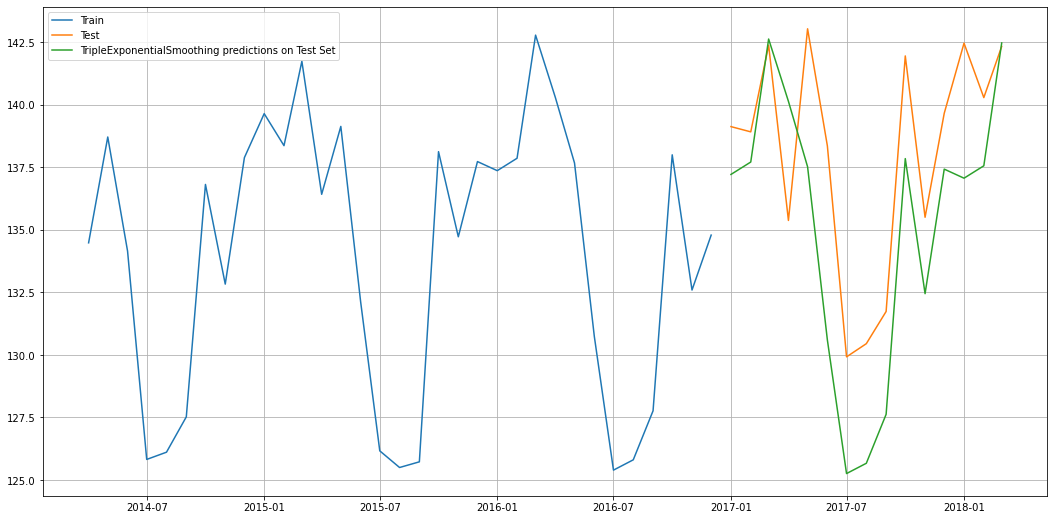

In [266]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['log_sales'], label='Train')
plt.plot(TES_test['log_sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [267]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['log_sales'],TES_test['auto_predict'],squared=False)
print("Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 4.063


In [268]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
ARIMA(0,1,0)                 5.413198
RegressionOnTime             6.184009
ARIMA(0,1,2)                 6.283640
SARIMA(2,1,2)(0,1,0,12)      4.608842
SARIMA(0,1,2)(0,1,1,12)      4.343859
TripleExponentialSmoothing   4.063106

In [269]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [270]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test_M))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['log_sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['log_sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [271]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
0             0.1          0.1           0.1    1.615356   3.542442
1             0.1          0.1           0.2    1.576857   3.628552
2             0.1          0.1           0.3    1.541638   3.726678
3             0.1          0.1           0.4    1.509931   3.832647
4             0.1          0.1           0.5    1.481963   3.943098
..            ...          ...           ...         ...        ...
724           0.9          0.9           0.5    2.514722  13.418473
725           0.9          0.9           0.6    2.564422  10.384368
726           0.9          0.9           0.7    2.653459   7.537884
727           0.9          0.9           0.8    2.777672   5.252890
728           0.9          0.9           0.9    2.932246   4.569275

[729 rows x 5 columns]

In [272]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
0           0.1          0.1           0.1    1.615356   3.542442
1           0.1          0.1           0.2    1.576857   3.628552
2           0.1          0.1           0.3    1.541638   3.726678
9           0.1          0.2           0.1    1.627867   3.792822
3           0.1          0.1           0.4    1.509931   3.832647

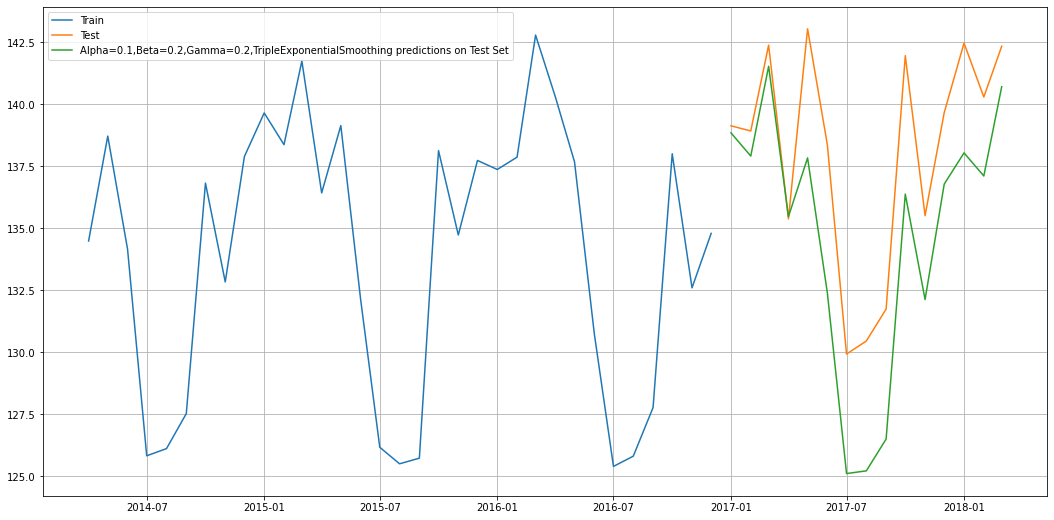

In [273]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['log_sales'], label='Train')
plt.plot(TES_test['log_sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [274]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
ARIMA(0,1,0)                                         5.413198
RegressionOnTime                                     6.184009
ARIMA(0,1,2)                                         6.283640
SARIMA(2,1,2)(0,1,0,12)                              4.608842
SARIMA(0,1,2)(0,1,1,12)                              4.343859
TripleExponentialSmoothing                           4.063106
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   3.542442

In [275]:
resultsDf.sort_values('Test RMSE',ascending=True)

Test RMSE
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...   3.542442
TripleExponentialSmoothing                           4.063106
SARIMA(0,1,2)(0,1,1,12)                              4.343859
SARIMA(2,1,2)(0,1,0,12)                              4.608842
ARIMA(0,1,0)                                         5.413198
RegressionOnTime                                     6.184009
ARIMA(0,1,2)                                         6.283640

## COOLERS

In [276]:
df_C=df_coolers.groupby(['date']).sum()
df_C.head(10)

log_sales
date                  
2014-04-01  146.863057
2014-05-01  135.325586
2014-06-01   99.943701
2014-07-01    0.000000
2014-08-01    0.000000
2014-09-01    0.000000
2014-10-01   80.847022
2014-11-01   97.764189
2014-12-01   96.965117
2015-01-01  127.500331

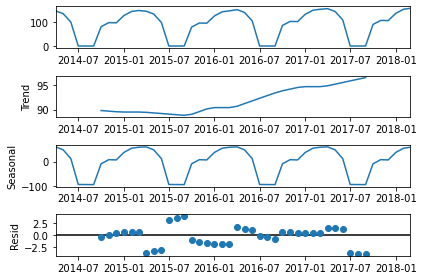

In [280]:
decomposition = seasonal_decompose(df_C,model='addictive')
decomposition.plot();

In [281]:
train_C=df_C.loc['2014-01-01':'2016-12-31']
test_C=df_C.loc['2017-01-01':'2018-12-31']

In [282]:
print(train_C.shape)
print(test_C.shape)

(33, 1)
(15, 1)


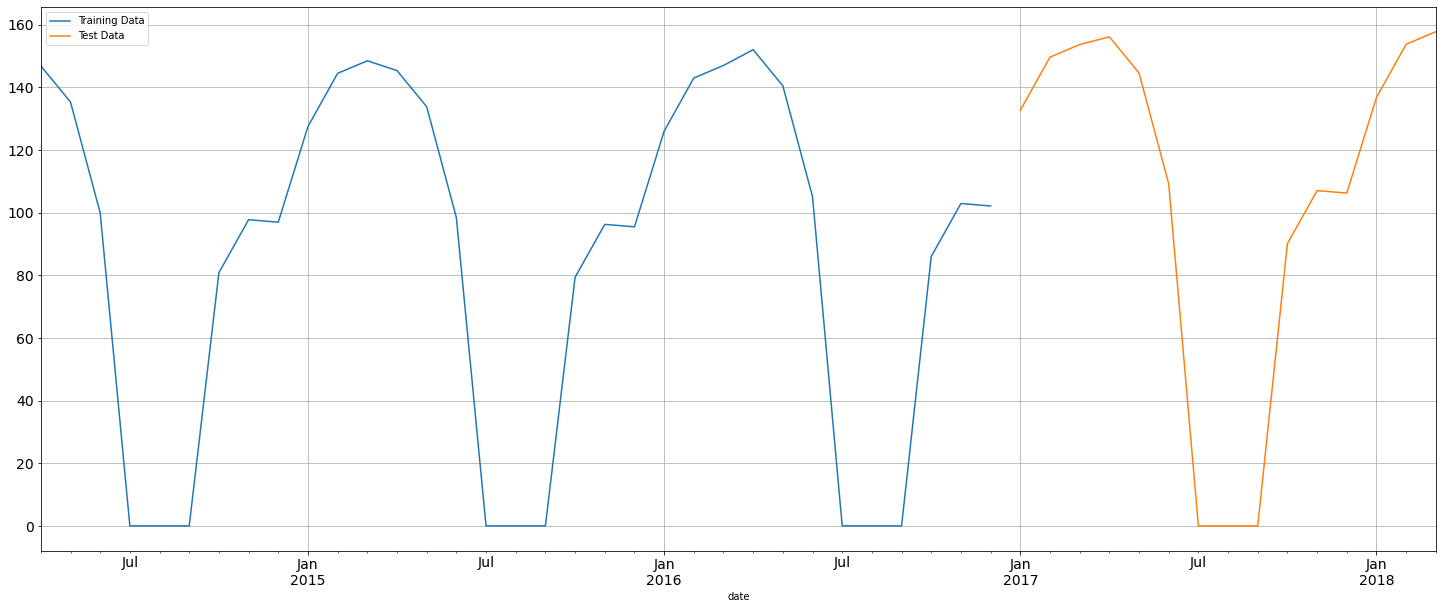

In [284]:
train_C['log_sales'].plot(figsize=(25,10), fontsize=14, kind="line")
test_C['log_sales'].plot(figsize=(25,10), fontsize=14,kind="line")
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [299]:
LinearRegression_train_C = train_C.copy()
LinearRegression_test_C = test_C.copy()

In [302]:
print('First few rows of Training Data','\n',LinearRegression_train_C.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train_C.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test_C.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test_C.tail(),'\n')

First few rows of Training Data 
              log_sales
date                  
2014-04-01  146.863057
2014-05-01  135.325586
2014-06-01   99.943701
2014-07-01    0.000000
2014-08-01    0.000000 

Last few rows of Training Data 
              log_sales
date                  
2016-08-01    0.000000
2016-09-01    0.000000
2016-10-01   86.020050
2016-11-01  102.940229
2016-12-01  102.140557 

First few rows of Test Data 
              log_sales
date                  
2017-01-01  132.676652
2017-02-01  149.668021
2017-03-01  153.670511
2017-04-01  156.150949
2017-05-01  144.613465 

Last few rows of Test Data 
              log_sales
date                  
2017-11-01  107.051564
2017-12-01  106.251947
2018-01-01  136.788193
2018-02-01  153.779569
2018-03-01  157.782060 



In [305]:
lr = LinearRegression()

In [304]:
train_time = [i+1 for i in range(len(train_C))]
test_time = [i+133 for i in range(len(test_C))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147]


In [303]:
LinearRegression_train_C['time'] = train_time
LinearRegression_test_C['time'] = test_time

In [306]:
lr.fit(LinearRegression_train_C[['time']],LinearRegression_train_C['log_sales'].values)

LinearRegression()

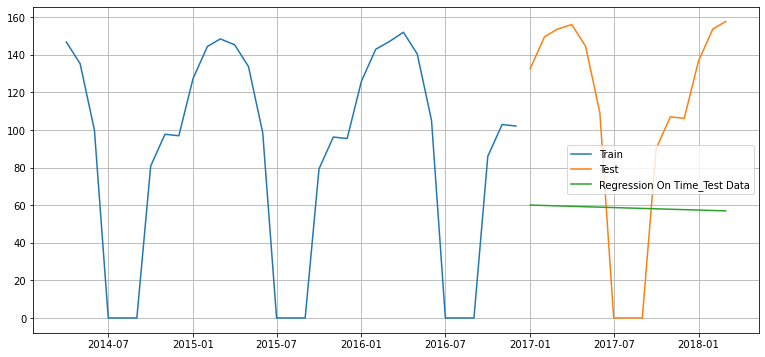

In [307]:
test_predictions_model1  = lr.predict(LinearRegression_test_C[['time']])
LinearRegression_test_C['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train_C['log_sales'], label='Train')
plt.plot(test_C['log_sales'], label='Test')
plt.plot(LinearRegression_test_C['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [308]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test_C['log_sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 74.490


In [309]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  74.490109

In [311]:
TES_train = train_C.copy()
TES_test = test_C.copy()

In [313]:
model_TES = ExponentialSmoothing(TES_train['log_sales'],trend='additive')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [314]:
model_TES_autofit = model_TES.fit()

In [315]:
model_TES_autofit.params

{'smoothing_level': 0.9945791542459561,
 'smoothing_trend': 0.023054751620356966,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 147.30318673129352,
 'initial_trend': -2.0011569896542873,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [316]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test_C))
TES_test.head()

log_sales  auto_predict
date                                
2017-01-01  132.676652    100.931436
2017-02-01  149.668021     99.725144
2017-03-01  153.670511     98.518853
2017-04-01  156.150949     97.312561
2017-05-01  144.613465     96.106269

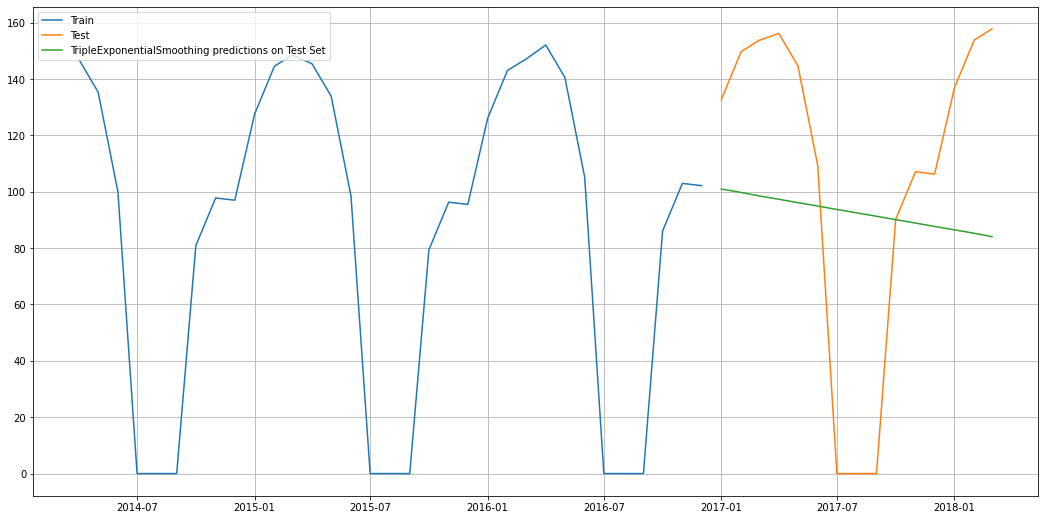

In [317]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['log_sales'], label='Train')
plt.plot(TES_test['log_sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [318]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['log_sales'],TES_test['auto_predict'],squared=False)
print("Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 58.636


In [319]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime            74.490109
TripleExponentialSmoothing  58.635590

In [320]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [321]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test_C))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['log_sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['log_sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [322]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
0             0.1          0.1           0.1   78.044644  66.597594
1             0.1          0.1           0.2   78.044644  66.597594
2             0.1          0.1           0.3   78.044644  66.597594
3             0.1          0.1           0.4   78.044644  66.597594
4             0.1          0.1           0.5   78.044644  66.597594
..            ...          ...           ...         ...        ...
724           0.9          0.9           0.5   47.677960  60.578290
725           0.9          0.9           0.6   47.677960  60.578290
726           0.9          0.9           0.7   47.677960  60.578290
727           0.9          0.9           0.8   47.677960  60.578290
728           0.9          0.9           0.9   47.677960  60.578290

[729 rows x 5 columns]

In [323]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
14           0.1          0.2           0.6   74.391557  57.554996
17           0.1          0.2           0.9   74.391557  57.554996
16           0.1          0.2           0.8   74.391557  57.554996
15           0.1          0.2           0.7   74.391557  57.554996
13           0.1          0.2           0.5   74.391557  57.554996

In [324]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['log_sales'], label='Train')
plt.plot(TES_test['log_sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1, 0.2, 0.6], label='Alpha=0.1,Beta=0.2,Gamma=0.6,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [325]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.6,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                    74.490109
TripleExponentialSmoothing                          58.635590
Alpha=0.1,Beta=0.2,Gamma=0.6,TripleExponentialS...  57.554996

In [326]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

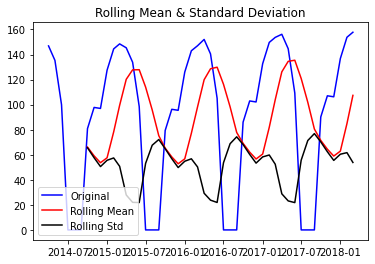

Results of Dickey-Fuller Test:
Test Statistic                -9.710930e+00
p-value                        1.012077e-16
#Lags Used                     8.000000e+00
Number of Observations Used    3.900000e+01
Critical Value (1%)           -3.610400e+00
Critical Value (5%)           -2.939109e+00
Critical Value (10%)          -2.608063e+00
dtype: float64 



In [327]:
test_stationarity(df_C['log_sales'])

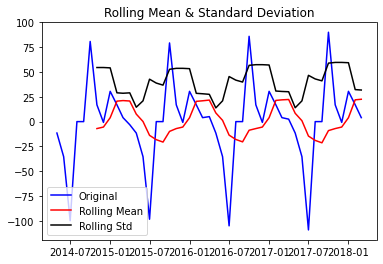

Results of Dickey-Fuller Test:
Test Statistic                -47.952069
p-value                         0.000000
#Lags Used                     10.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64 



In [328]:
test_stationarity(df_C['log_sales'].diff().dropna())

In [333]:
# The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 2)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (1, 1, 0)
Model: (1, 1, 1)


In [334]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [335]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_C['log_sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:335.12609131574516
ARIMA(0, 1, 1) - AIC:334.83453976876774
ARIMA(1, 1, 0) - AIC:334.3244319838543
ARIMA(1, 1, 1) - AIC:336.4634875570657


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

In [336]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param         AIC
2  (1, 1, 0)  334.324432
1  (0, 1, 1)  334.834540
0  (0, 1, 0)  335.126091
3  (1, 1, 1)  336.463488

In [337]:
auto_ARIMA = ARIMA(train_C['log_sales'], order=(1,1,0))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.log_sales   No. Observations:                   32
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -164.162
Method:                       css-mle   S.D. of innovations             40.846
Date:                Thu, 09 Sep 2021   AIC                            334.324
Time:                        16:54:49   BIC                            338.722
Sample:                    05-01-2014   HQIC                           335.782
                         - 12-01-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.5137      9.978     -0.152      0.879     -21.071      18.044
ar.L1.D.log_sales     0.2852      0.166      1.717      0.086      -0.040       0.611
                        

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [338]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_C))

In [339]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test_C['log_sales'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

59.24820095580872


In [340]:
resultsDf_autoarima = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(1,1,0)'])

resultsDf=pd.concat([resultsDf_autoarima,resultsDf])

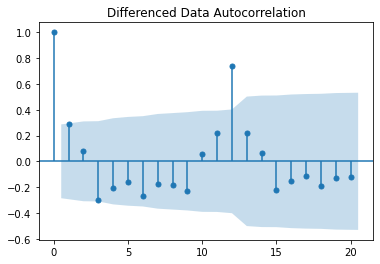

In [342]:
#plot_acf(df['RetailSales'],lags=50)
plot_acf(df_C['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


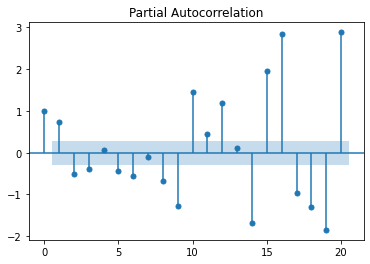

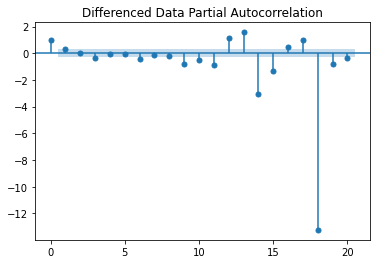

In [343]:
plot_pacf(df_C['log_sales'],lags=20)
plot_pacf(df_C['log_sales'].diff().dropna(),lags=20,title='Differenced Data Partial Autocorrelation')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


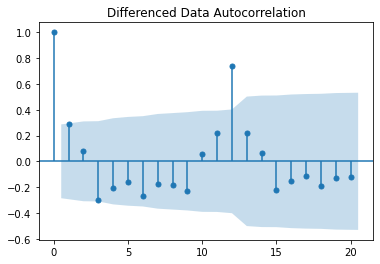

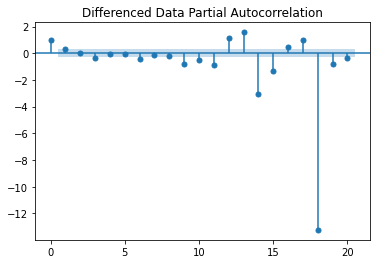

In [344]:
plot_acf(df_C['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plot_pacf(df_C['log_sales'].diff().dropna(),lags=20,title='Differenced Data Partial Autocorrelation')
plt.show()

In [345]:
manual_ARIMA = ARIMA(train_C['log_sales'].astype('float64'), order=(1,1,0)) #order = (p=0,d=1,q=0)

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.log_sales   No. Observations:                   32
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -164.162
Method:                       css-mle   S.D. of innovations             40.846
Date:                Thu, 09 Sep 2021   AIC                            334.324
Time:                        17:00:00   BIC                            338.722
Sample:                    05-01-2014   HQIC                           335.782
                         - 12-01-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.5137      9.978     -0.152      0.879     -21.071      18.044
ar.L1.D.log_sales     0.2852      0.166      1.717      0.086      -0.040       0.611
                        

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [346]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_C))

In [347]:
rmse = mean_squared_error(test_C['log_sales'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

59.24820095580872


In [348]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(1,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
ARIMA(1,1,0)                                        59.248201
RegressionOnTime                                    74.490109
TripleExponentialSmoothing                          58.635590
Alpha=0.1,Beta=0.2,Gamma=0.6,TripleExponentialS...  57.554996
ARIMA(1,1,0)                                        59.248201

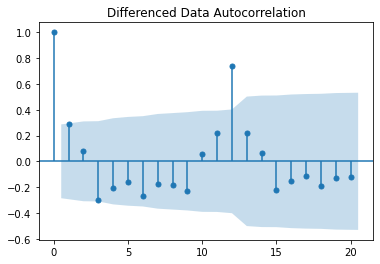

In [349]:
plot_acf(df_C['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plt.show()

In [350]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p,d,q))
model_pdq = [(x[1], x[1], x[0], 12) for x in list(itertools.product(p,d,q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(1, 1, 0, 12)
Model: (0, 1, 2)(1, 1, 0, 12)
Model: (1, 1, 0)(1, 1, 1, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 1, 12)
Model: (2, 1, 0)(1, 1, 2, 12)
Model: (2, 1, 1)(1, 1, 2, 12)
Model: (2, 1, 2)(1, 1, 2, 12)


In [351]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [352]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_C['log_sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:100.54378133787766
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:100.54378133787766
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:100.54378133787766
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:102.54413544057302
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:102.54413544057302


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:102.54413544057302
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:104.54279302703266
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:104.54279302703266
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:104.54279302703266
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:102.54378064105826
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:102.54378064105826
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:102.54378064105826
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:104.54410084924909
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:104.54410084924909
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:104.54410084924909
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:106.54412545125828
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:106.54412545125828
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:106.54412545125828
SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:103.05549924616152
SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:103.05549924616152
SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:103.05549924616152
SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:105.05582011127989
SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:105.05582011127989
SARIMA(0, 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:106.31560559055809
SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:106.31560559055809
SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:106.31560559055809
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:108.31523361317731
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:108.31523361317731
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:108.31523361317731
SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:110.31523337136636
SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:110.31523337136636
SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:110.31523337136636
SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:104.3893622144783
SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:104.3893622144783
SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:104.3893622144783
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:106.37385276271105
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:106.37385276271105
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:106.37385276271105
SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:108.3625147876054
SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:108.3625147876054
SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:108.3625147876054
SARIMA(2, 1, 0)x

In [353]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
0   (0, 1, 0)  (1, 1, 0, 12)  100.543781
1   (0, 1, 0)  (1, 1, 0, 12)  100.543781
2   (0, 1, 0)  (1, 1, 0, 12)  100.543781
74  (2, 1, 2)  (1, 1, 0, 12)  102.475989
73  (2, 1, 2)  (1, 1, 0, 12)  102.475989

In [354]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_C['log_sales'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   33
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 -48.272
Date:                            Thu, 09 Sep 2021   AIC                            100.544
Time:                                    17:04:49   BIC                            102.535
Sample:                                         0   HQIC                           100.933
                                             - 33                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5599      0.342     -1.636      0.102      -1.231       0.111
sigma2         5.8341      2.481   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


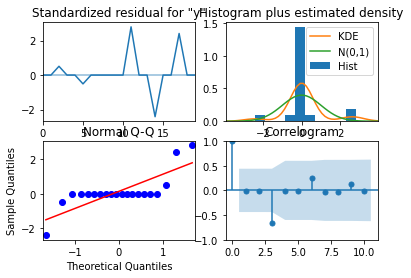

In [355]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [356]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test_C))

In [357]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean   mean_se  mean_ci_lower  mean_ci_upper
0  132.675679  2.415393     127.941595     137.409762
1  149.667029  3.415882     142.972023     156.362034
2  153.669517  4.183584     145.469843     161.869190
3  154.138144  4.830786     144.669977     163.606311
4  142.600674  5.400983     132.014942     153.186407

In [358]:
rmse = mean_squared_error(test_C['log_sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

3.0380598908555294


In [359]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(1,1,0,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
ARIMA(1,1,0)                                        59.248201
RegressionOnTime                                    74.490109
TripleExponentialSmoothing                          58.635590
Alpha=0.1,Beta=0.2,Gamma=0.6,TripleExponentialS...  57.554996
ARIMA(1,1,0)                                        59.248201
SARIMA(0,1,0)(1,1,0,12)                              3.038060

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


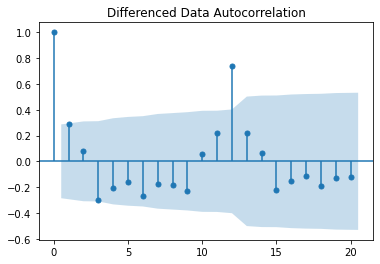

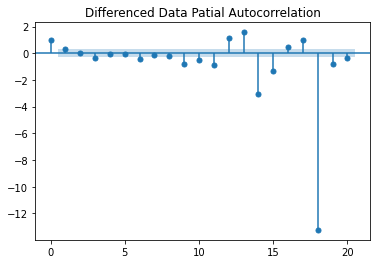

In [360]:
plot_acf(df_C['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plot_pacf(df_C['log_sales'].diff().dropna(),lags=20,title='Differenced Data Patial Autocorrelation')
plt.show()

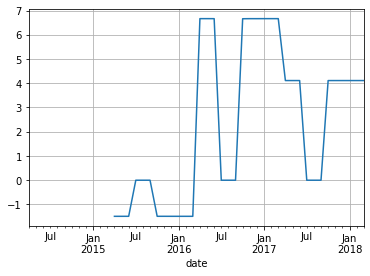

In [361]:
(df_C['log_sales'].diff(12)).plot()
plt.grid();

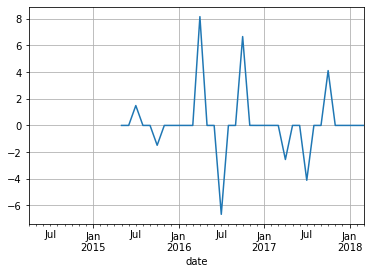

In [362]:
(df_C['log_sales'].diff(12)).diff().plot()
plt.grid();

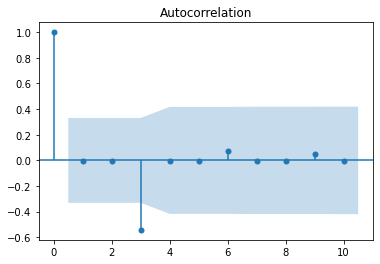

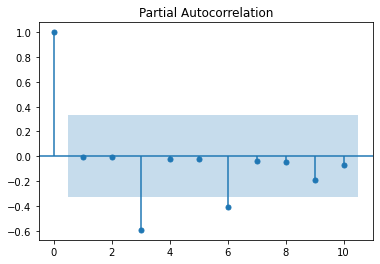

In [364]:
plot_acf((df_C['log_sales'].diff(12).dropna()).diff().dropna(),lags=10)
plot_pacf((df_C['log_sales'].diff(12).dropna()).diff().dropna(),lags=10);

In [365]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_C['log_sales'].values,
                                order=(0,1,2),
                                seasonal_order=(0,1,1,12),
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   33
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood                 -47.546
Date:                              Thu, 09 Sep 2021   AIC                            103.092
Time:                                      17:10:02   BIC                            107.075
Sample:                                           0   HQIC                           103.869
                                               - 33                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4642      0.244      1.904      0.057      -0.014       0.942
ma.L2          0.55

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


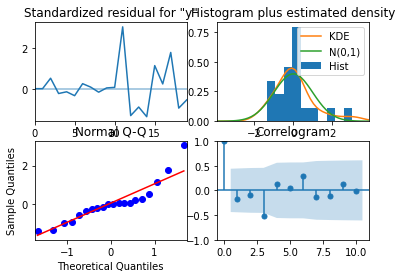

In [366]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [367]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test_C))

In [368]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean   mean_se  mean_ci_lower  mean_ci_upper
0  130.823032  2.345449     126.226037     135.420027
1  147.091690  4.158479     138.941221     155.242158
2  151.065716  6.301416     138.715167     163.416265
3  151.801274  7.853136     136.409410     167.193138
4  140.263924  9.038171     122.549435     157.978413

In [369]:
rmse = mean_squared_error(test_C['log_sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

4.089291599213016


In [370]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,0)(1,1,0,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
ARIMA(1,1,0)                                        59.248201
RegressionOnTime                                    74.490109
TripleExponentialSmoothing                          58.635590
Alpha=0.1,Beta=0.2,Gamma=0.6,TripleExponentialS...  57.554996
ARIMA(1,1,0)                                        59.248201
SARIMA(0,1,0)(1,1,0,12)                              3.038060
SARIMA(1,1,0)(1,1,0,12)                              4.089292

In [371]:
resultsDf.sort_values('Test RMSE',ascending=True)

Test RMSE
SARIMA(0,1,0)(1,1,0,12)                              3.038060
SARIMA(1,1,0)(1,1,0,12)                              4.089292
Alpha=0.1,Beta=0.2,Gamma=0.6,TripleExponentialS...  57.554996
TripleExponentialSmoothing                          58.635590
ARIMA(1,1,0)                                        59.248201
ARIMA(1,1,0)                                        59.248201
RegressionOnTime                                    74.490109

## BANGALORE

In [372]:
df_B=df_Bangalore.groupby(['date']).sum()
df_B.head(10)

log_sales
date                  
2014-04-01  127.063237
2014-05-01  131.292874
2014-06-01  126.735282
2014-07-01  118.499006
2014-08-01  118.788861
2014-09-01  120.200535
2014-10-01  129.396568
2014-11-01  125.413648
2014-12-01  130.468896
2015-01-01  132.226496

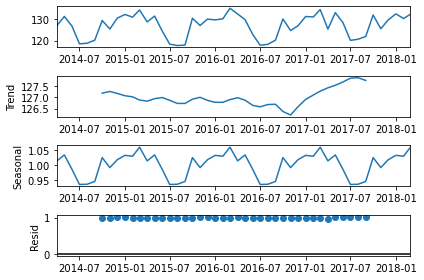

In [373]:
decomposition = seasonal_decompose(df_B,model='multiplicative')
decomposition.plot();

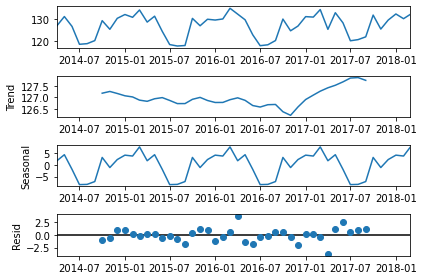

In [374]:
decomposition = seasonal_decompose(df_B,model='addictive')
decomposition.plot();

In [375]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 date
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01           NaN
2014-08-01           NaN
2014-09-01           NaN
2014-10-01    127.182324
2014-11-01    127.258772
2014-12-01    127.170201
2015-01-01    127.069634
2015-02-01    127.019105
2015-03-01    126.879393
Name: trend, dtype: float64 

Seasonality 
 date
2014-04-01    1.730359
2014-05-01    4.277888
2014-06-01   -1.916202
2014-07-01   -8.356901
2014-08-01   -8.260482
2014-09-01   -7.066732
2014-10-01    3.120700
2014-11-01   -1.143587
2014-12-01    2.227901
2015-01-01    4.092632
2015-02-01    3.713071
2015-03-01    7.581353
Name: seasonal, dtype: float64 

Residual 
 date
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01   -0.906456
2014-11-01   -0.701538
2014-12-01    1.070794
2015-01-01    1.064230
2015-02-01    0.214131
2015-03-01   -0.142355
Name: resid, dtype: float64 



In [376]:
train_B=df_B.loc['2014-01-01':'2016-12-31']
test_B=df_B.loc['2017-01-01':'2018-12-31']

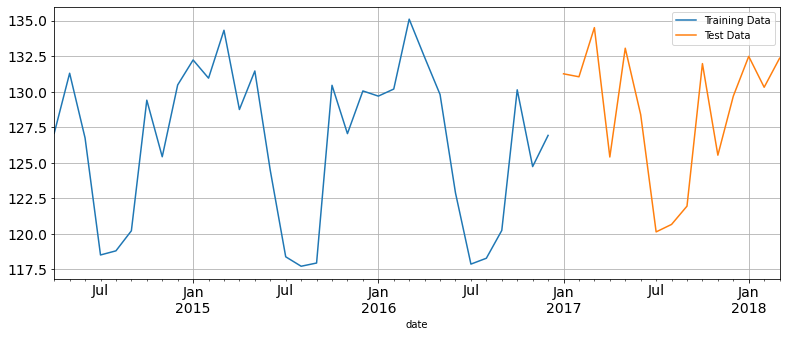

In [377]:
train_B['log_sales'].plot(figsize=(13,5), fontsize=14)
test_B['log_sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [378]:
train_time = [i+1 for i in range(len(train_B))]
test_time = [i+133 for i in range(len(test_B))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147]


In [380]:
LinearRegression_train = train_B.copy()
LinearRegression_test = test_B.copy()

In [381]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              log_sales  time
date                        
2014-04-01  127.063237     1
2014-05-01  131.292874     2
2014-06-01  126.735282     3
2014-07-01  118.499006     4
2014-08-01  118.788861     5 

Last few rows of Training Data 
              log_sales  time
date                        
2016-08-01  118.268108    29
2016-09-01  120.226838    30
2016-10-01  130.125173    31
2016-11-01  124.720905    32
2016-12-01  126.916639    33 

First few rows of Test Data 
              log_sales  time
date                        
2017-01-01  131.252411   133
2017-02-01  131.042922   134
2017-03-01  134.504659   135
2017-04-01  125.395711   136
2017-05-01  133.055274   137 

Last few rows of Test Data 
              log_sales  time
date                        
2017-11-01  125.523097   143
2017-12-01  129.678579   144
2018-01-01  132.481065   145
2018-02-01  130.305565   146
2018-03-01  132.351506   147 



In [382]:
lr = LinearRegression()

In [384]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['log_sales'].values)

LinearRegression()

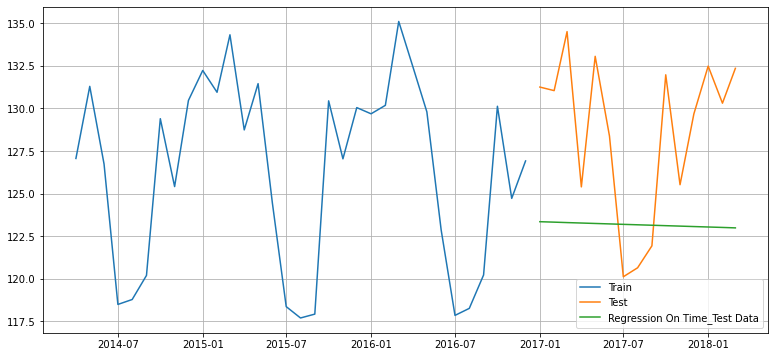

In [385]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train_B['log_sales'], label='Train')
plt.plot(test_B['log_sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [387]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test_B['log_sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 7.070


In [388]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime   7.069734

In [389]:
TES_train = train_B.copy()
TES_test = test_B.copy()

In [390]:
model_TES = ExponentialSmoothing(TES_train['log_sales'],trend='additive',seasonal='multiplicative')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [391]:
model_TES_autofit = model_TES.fit()

In [392]:
model_TES_autofit.params

{'smoothing_level': 3.6945900999848596e-08,
 'smoothing_trend': 1.4869853606143498e-09,
 'smoothing_seasonal': 0.9999999630009385,
 'damping_trend': nan,
 'initial_level': 129.4060106161735,
 'initial_trend': -0.029867627220009796,
 'initial_seasons': array([0.98212998, 1.01505433, 0.98005753, 0.91656743, 0.91902631,
        0.9301617 , 1.00155263, 0.97095867, 1.0103416 , 1.02418718,
        1.01449153, 1.04086992]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [393]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test_B))
TES_test.head()

log_sales  auto_predict
date                                
2017-01-01  131.252411    129.322345
2017-02-01  131.042922    129.817076
2017-03-01  134.504659    134.724200
2017-04-01  125.395711    132.046761
2017-05-01  133.055274    129.435550

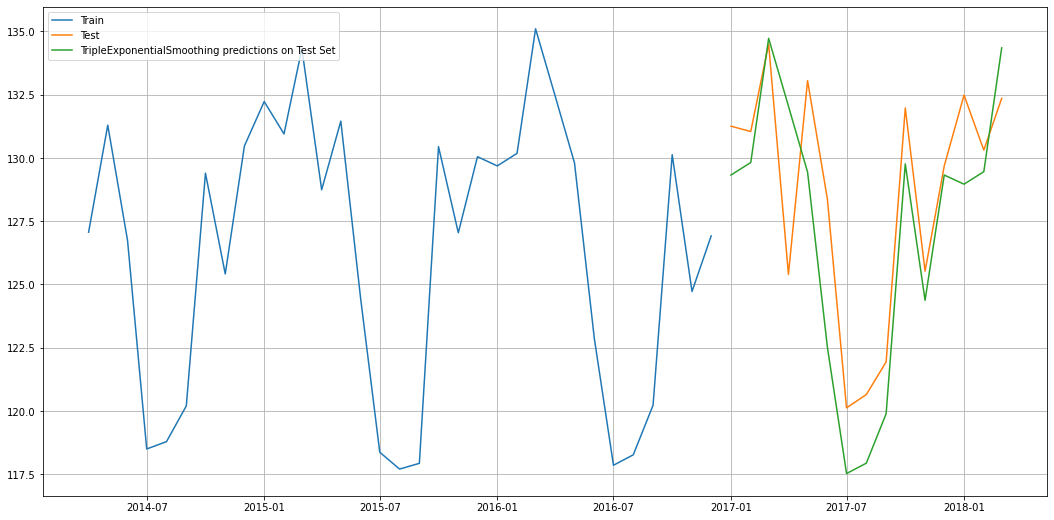

In [394]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['log_sales'], label='Train')
plt.plot(TES_test['log_sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [395]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['log_sales'],TES_test['auto_predict'],squared=False)
print("Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 3.039


In [396]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime             7.069734
TripleExponentialSmoothing   3.039016

In [397]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [398]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test_B))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['log_sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['log_sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [399]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
0             0.1          0.1           0.1    1.624636   2.049235
1             0.1          0.1           0.2    1.590237   2.178764
2             0.1          0.1           0.3    1.559586   2.320613
3             0.1          0.1           0.4    1.532922   2.467558
4             0.1          0.1           0.5    1.510473   2.614613
..            ...          ...           ...         ...        ...
724           0.9          0.9           0.5    2.535924  11.441418
725           0.9          0.9           0.6    2.588038   8.423045
726           0.9          0.9           0.7    2.676762   5.695018
727           0.9          0.9           0.8    2.798168   3.995701
728           0.9          0.9           0.9    2.947804   4.721323

[729 rows x 5 columns]

In [400]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
0            0.1          0.1           0.1    1.624636   2.049235
1            0.1          0.1           0.2    1.590237   2.178764
9            0.1          0.2           0.1    1.639390   2.201380
2            0.1          0.1           0.3    1.559586   2.320613
10           0.1          0.2           0.2    1.605149   2.324227

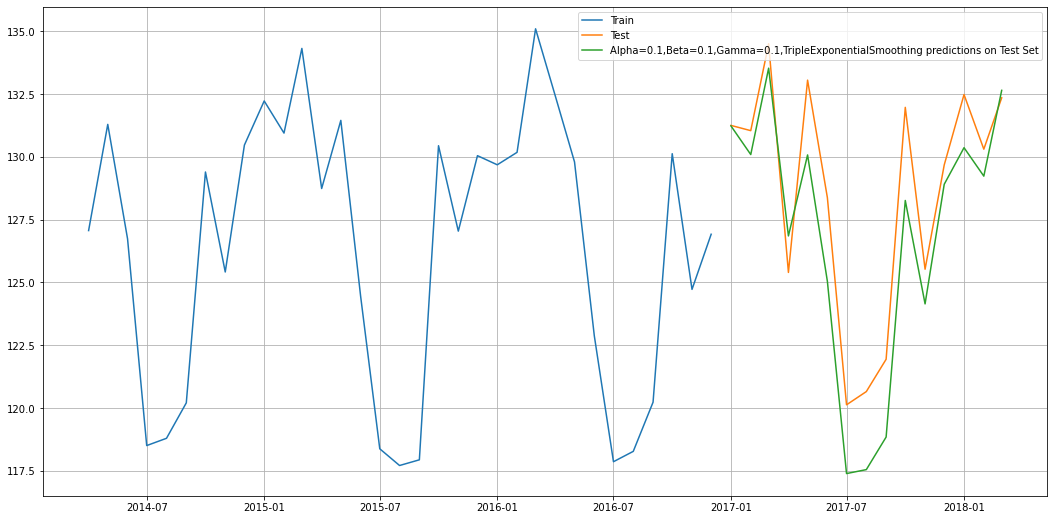

In [401]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['log_sales'], label='Train')
plt.plot(TES_test['log_sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1, 0.2, 0.1], label='Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [402]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                     7.069734
TripleExponentialSmoothing                           3.039016
Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialS...   2.049235

In [403]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

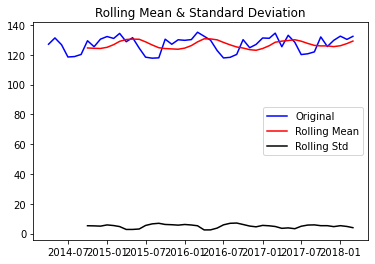

Results of Dickey-Fuller Test:
Test Statistic                -5.831410e+00
p-value                        3.967133e-07
#Lags Used                     8.000000e+00
Number of Observations Used    3.900000e+01
Critical Value (1%)           -3.610400e+00
Critical Value (5%)           -2.939109e+00
Critical Value (10%)          -2.608063e+00
dtype: float64 



In [404]:
test_stationarity(df_B['log_sales'])

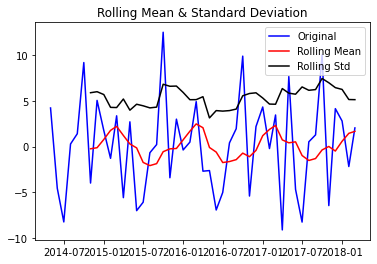

Results of Dickey-Fuller Test:
Test Statistic                -7.275456e+00
p-value                        1.548712e-10
#Lags Used                     1.000000e+01
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64 



In [405]:
test_stationarity(df_B['log_sales'].diff().dropna())

In [411]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 2)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (1, 1, 0)
Model: (1, 1, 1)


In [412]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [413]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_B['log_sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:197.8392433511463
ARIMA(0, 1, 1) - AIC:199.5535367688102
ARIMA(1, 1, 0) - AIC:199.5102227897201
ARIMA(1, 1, 1) - AIC:201.26337080456972


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

In [414]:
auto_ARIMA = ARIMA(train_B['log_sales'], order=(0,1,1))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.log_sales   No. Observations:                   32
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -96.777
Method:                       css-mle   S.D. of innovations              4.979
Date:                Thu, 09 Sep 2021   AIC                            199.554
Time:                        17:51:15   BIC                            203.951
Sample:                    05-01-2014   HQIC                           201.011
                         - 12-01-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0202      0.804     -0.025      0.980      -1.596       1.556
ma.L1.D.log_sales    -0.0896      0.170     -0.526      0.599      -0.423       0.244
                        

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [415]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_B))

In [416]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test_B['log_sales'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

4.970398308101266


In [417]:
resultsDf_autoarima = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,1)'])

resultsDf=pd.concat([resultsDf_autoarima,resultsDf])

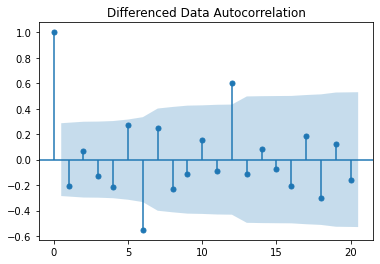

In [418]:
#plot_acf(df['RetailSales'],lags=50)
plot_acf(df_B['log_sales'].diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


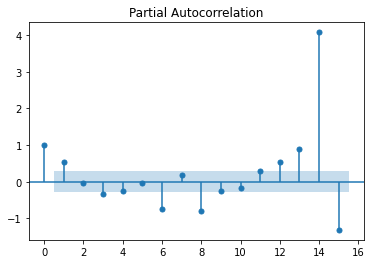

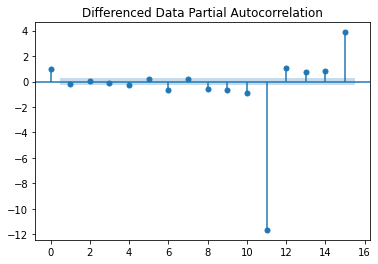

In [420]:
plot_pacf(df_B['log_sales'],lags=15)
plot_pacf(df_B['log_sales'].diff().dropna(),lags=15,title='Differenced Data Partial Autocorrelation')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


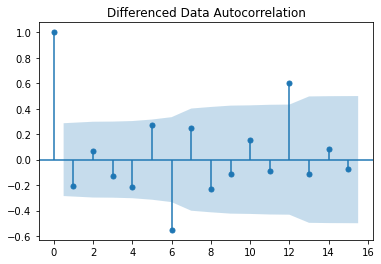

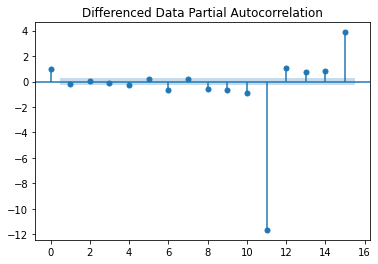

In [421]:
plot_acf(df_B['log_sales'].diff().dropna(),lags=15,title='Differenced Data Autocorrelation')
plot_pacf(df_B['log_sales'].diff().dropna(),lags=15,title='Differenced Data Partial Autocorrelation')
plt.show()

In [423]:
manual_ARIMA = ARIMA(train_B['log_sales'].astype('float64'), order=(0,1,2)) #order = (p=0,d=1,q=0)

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.log_sales   No. Observations:                   32
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 -96.606
Method:                       css-mle   S.D. of innovations              4.947
Date:                Thu, 09 Sep 2021   AIC                            201.212
Time:                        17:57:31   BIC                            207.075
Sample:                    05-01-2014   HQIC                           203.156
                         - 12-01-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0244      1.051     -0.023      0.981      -2.085       2.036
ma.L1.D.log_sales     0.0162      0.290      0.056      0.955      -0.552       0.584
ma.L2.D.log_sales     0.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [424]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_B))

In [425]:
rmse = mean_squared_error(test_B['log_sales'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

5.4396734514186145


In [426]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
ARIMA(0,1,1)                                         4.970398
RegressionOnTime                                     7.069734
TripleExponentialSmoothing                           3.039016
Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialS...   2.049235
ARIMA(0,1,2)                                         5.439673

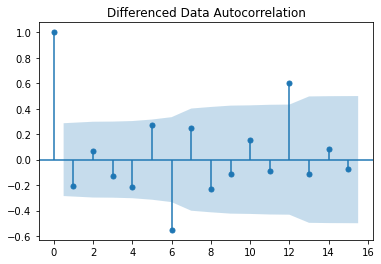

In [428]:
plot_acf(df_B['log_sales'].diff().dropna(),lags=15,title='Differenced Data Autocorrelation')
plt.show()

In [430]:
import itertools
p = q = range(0, 2)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p,d,q))
model_pdq = [(x[0], x[1], x[1], 12) for x in list(itertools.product(p,d,q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 0)(1, 1, 1, 12)
Model: (1, 1, 1)(1, 1, 1, 12)


In [431]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [432]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_B['log_sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:91.79446367985102
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:91.79446367985102
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:93.79446373322506
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:93.79446373322506
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:88.84784835773733
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:88.84784835773733
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:90.84784859070692
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:90.84784859070692
SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:93.64939218310481
SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:93.64939218310481
SARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:95.64939217647728
SARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:95.64939217647728
SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:89.69161576495479
SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:89.69161576495479
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:91.6916784066179
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:91.6916784066179


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [433]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal        AIC
4   (0, 1, 1)  (0, 1, 1, 12)  88.847848
5   (0, 1, 1)  (0, 1, 1, 12)  88.847848
12  (1, 1, 1)  (0, 1, 1, 12)  89.691616
13  (1, 1, 1)  (0, 1, 1, 12)  89.691616
6   (0, 1, 1)  (1, 1, 1, 12)  90.847849

In [434]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_B['log_sales'].values,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   33
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 -41.424
Date:                            Thu, 09 Sep 2021   AIC                             88.848
Time:                                    18:20:20   BIC                             91.835
Sample:                                         0   HQIC                            89.431
                                             - 33                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   1.05e+04  -9.49e-05      1.000   -2.07e+04    2.07e+04
ma.S.L12       0.0598      0.344   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


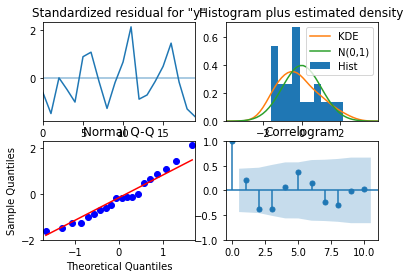

In [435]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [436]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test_B))

In [437]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean   mean_se  mean_ci_lower  mean_ci_upper
0  129.205903  1.818678     125.641359     132.770447
1  129.807871  1.818678     126.243327     133.372415
2  134.821003  1.818678     131.256459     138.385547
3  132.302193  1.818943     128.737131     135.867256
4  129.370574  1.818943     125.805512     132.935637

In [438]:
rmse = mean_squared_error(test_B['log_sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

3.2172011805469367


In [439]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,1)(0,1,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
ARIMA(0,1,1)                                         4.970398
RegressionOnTime                                     7.069734
TripleExponentialSmoothing                           3.039016
Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialS...   2.049235
ARIMA(0,1,2)                                         5.439673
SARIMA(0,1,1)(0,1,1,12)                              3.217201

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


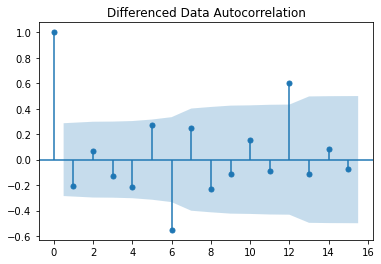

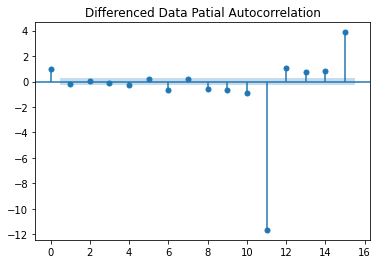

In [440]:
plot_acf(df_B['log_sales'].diff().dropna(),lags=15,title='Differenced Data Autocorrelation')
plot_pacf(df_B['log_sales'].diff().dropna(),lags=15,title='Differenced Data Patial Autocorrelation')
plt.show()

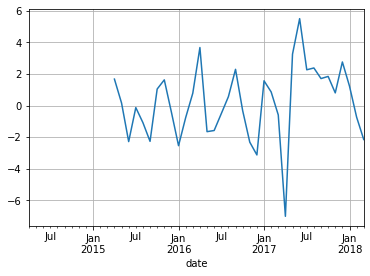

In [441]:
(df_B['log_sales'].diff(12)).plot()
plt.grid();

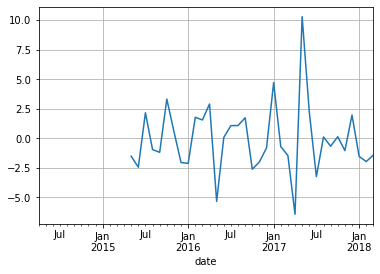

In [442]:
(df_B['log_sales'].diff(12)).diff().plot()
plt.grid();

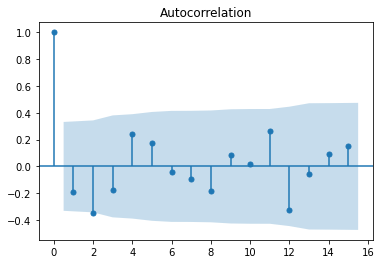

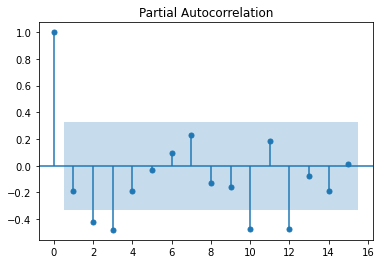

In [443]:
plot_acf((df_B['log_sales'].diff(12).dropna()).diff().dropna(),lags=15)
plot_pacf((df_B['log_sales'].diff(12).dropna()).diff().dropna(),lags=15);

In [445]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_B['log_sales'].values,
                                order=(4,1,2),
                                seasonal_order=(0,1,1,12),
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   33
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood                 -36.203
Date:                              Thu, 09 Sep 2021   AIC                             88.406
Time:                                      18:30:38   BIC                             96.372
Sample:                                           0   HQIC                            89.961
                                               - 33                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1787      2.416     -0.074      0.941      -4.913       4.556
ar.L2         -0.58

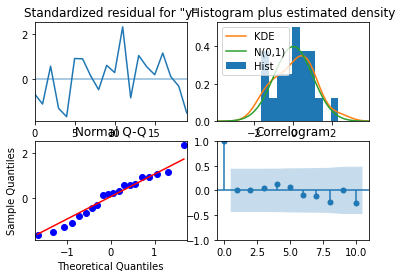

In [446]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [447]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test_B))

In [448]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean   mean_se  mean_ci_lower  mean_ci_upper
0  130.346687  1.300491     127.797771     132.895602
1  132.419575  1.299103     129.873379     134.965770
2  135.710945  1.467056     132.835569     138.586321
3  130.804789  1.518584     127.828419     133.781159
4  127.861912  1.536764     124.849910     130.873914

In [449]:
rmse = mean_squared_error(test_B['log_sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

2.9783362945572067


In [450]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(4,1,2)(0,1,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
ARIMA(0,1,1)                                         4.970398
RegressionOnTime                                     7.069734
TripleExponentialSmoothing                           3.039016
Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialS...   2.049235
ARIMA(0,1,2)                                         5.439673
SARIMA(0,1,1)(0,1,1,12)                              3.217201
SARIMA(4,1,2)(0,1,1,12)                              2.978336

In [451]:
resultsDf.sort_values('Test RMSE',ascending=True)

Test RMSE
Alpha=0.1,Beta=0.1,Gamma=0.1,TripleExponentialS...   2.049235
SARIMA(4,1,2)(0,1,1,12)                              2.978336
TripleExponentialSmoothing                           3.039016
SARIMA(0,1,1)(0,1,1,12)                              3.217201
ARIMA(0,1,1)                                         4.970398
ARIMA(0,1,2)                                         5.439673
RegressionOnTime                                     7.069734

## KOLKATA

In [452]:
df_K=df_Kolkata.groupby(['date']).sum()
df_K.head(10)

log_sales
date                  
2014-04-01  122.087522
2014-05-01  126.317071
2014-06-01  121.759615
2014-07-01  115.245741
2014-08-01  115.535557
2014-09-01  116.947247
2014-10-01  124.421079
2014-11-01  120.437876
2014-12-01  125.493233
2015-01-01  127.250657

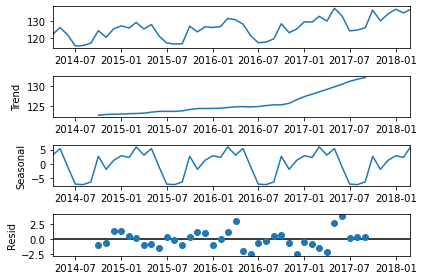

In [453]:
### Decompose

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_K,model='addictive')
decomposition.plot();


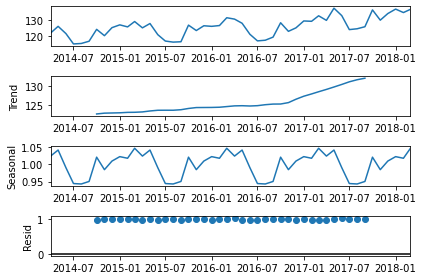

In [454]:
### Decompose

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_K,model='multiplicative')
decomposition.plot();


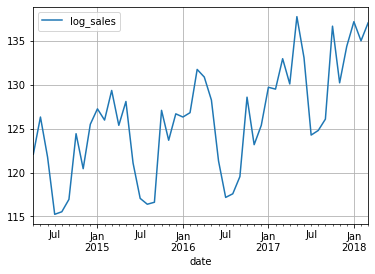

In [455]:
df_K.plot();
plt.grid()

In [456]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 date
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01           NaN
2014-08-01           NaN
2014-09-01           NaN
2014-10-01    122.704301
2014-11-01    122.914959
2014-12-01    122.960605
2015-01-01    123.008033
2015-02-01    123.119271
2015-03-01    123.141327
Name: trend, dtype: float64 

Seasonality 
 date
2014-04-01    1.024549
2014-05-01    1.042142
2014-06-01    0.990672
2014-07-01    0.944329
2014-08-01    0.943048
2014-09-01    0.950416
2014-10-01    1.021375
2014-11-01    0.984900
2014-12-01    1.009994
2015-01-01    1.022928
2015-02-01    1.018204
2015-03-01    1.047444
Name: seasonal, dtype: float64 

Residual 
 date
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01    0.992771
2014-11-01    0.994870
2014-12-01    1.010498
2015-01-01    1.011304
2015-02-01    1.004865
2015-03-01    1.002782
Name: resid, dtype: float64 



In [457]:
train_K=df_K.loc['2014-01-01':'2016-12-31']
test_K=df_K.loc['2017-01-01':'2018-12-31']

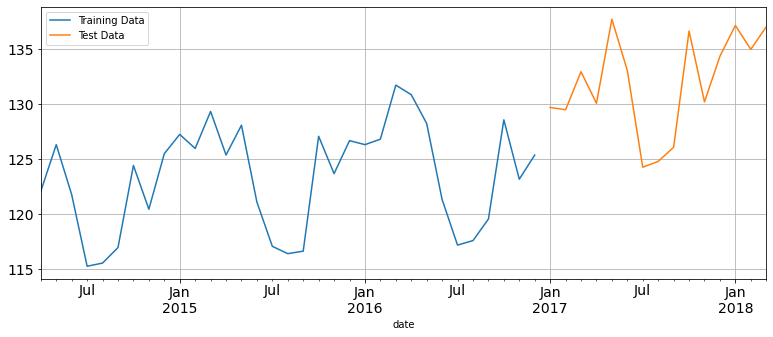

In [458]:
train_K['log_sales'].plot(figsize=(13,5), fontsize=14)
test_K['log_sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [459]:
train_time = [i+1 for i in range(len(train_K))]
test_time = [i+133 for i in range(len(test_K))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147]


In [460]:
LinearRegression_train = train_K.copy()
LinearRegression_test = test_K.copy()

In [461]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              log_sales  time
date                        
2014-04-01  122.087522     1
2014-05-01  126.317071     2
2014-06-01  121.759615     3
2014-07-01  115.245741     4
2014-08-01  115.535557     5 

Last few rows of Training Data 
              log_sales  time
date                        
2016-08-01  117.581730    29
2016-09-01  119.540449    30
2016-10-01  128.576806    31
2016-11-01  123.172513    32
2016-12-01  125.368225    33 

First few rows of Test Data 
              log_sales  time
date                        
2017-01-01  129.703951   133
2017-02-01  129.494464   134
2017-03-01  132.956191   135
2017-04-01  130.083222   136
2017-05-01  137.742842   137 

Last few rows of Test Data 
              log_sales  time
date                        
2017-11-01  130.210648   143
2017-12-01  134.366157   144
2018-01-01  137.168659   145
2018-02-01  134.993129   146
2018-03-01  137.039061   147 



In [462]:
lr = LinearRegression()

In [464]:
lr.fit(LinearRegression_train[['log_sales']],LinearRegression_train['log_sales'].values)

LinearRegression()

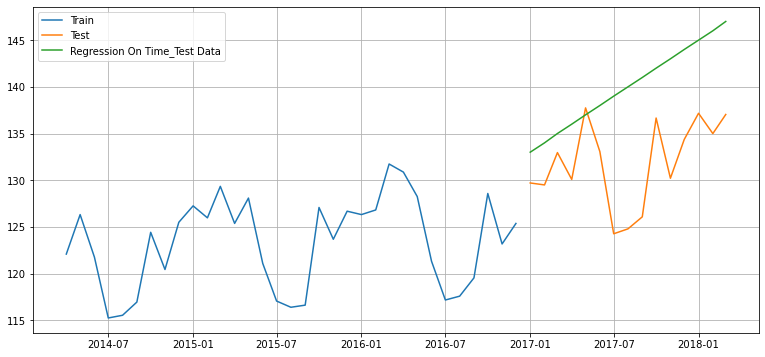

In [465]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train_K['log_sales'], label='Train')
plt.plot(test_K['log_sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [466]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test_K['log_sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 9.427


In [467]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime   9.427249

In [468]:
TES_train = train_K.copy()
TES_test = test_K.copy()

In [469]:
model_TES = ExponentialSmoothing(TES_train['log_sales'],trend='additive',seasonal='multiplicative')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [470]:
model_TES_autofit = model_TES.fit()

In [471]:
model_TES_autofit.params

{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 4.9206465347330555e-09,
 'smoothing_seasonal': 0.9999999850988388,
 'damping_trend': nan,
 'initial_level': 125.8579423749217,
 'initial_trend': 0.10665623257264023,
 'initial_seasons': array([0.96922197, 1.0019492 , 0.96498297, 0.91258683, 0.91411   ,
        0.92449904, 0.98275318, 0.95049072, 0.98955429, 1.00256891,
        0.99164916, 1.01734032]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [472]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test_K))
TES_test.head()

log_sales  auto_predict
date                                
2017-01-01  129.703951    127.579162
2017-02-01  129.494464    128.079255
2017-03-01  132.956191    133.048170
2017-04-01  130.083222    132.170374
2017-05-01  137.742842    129.524821

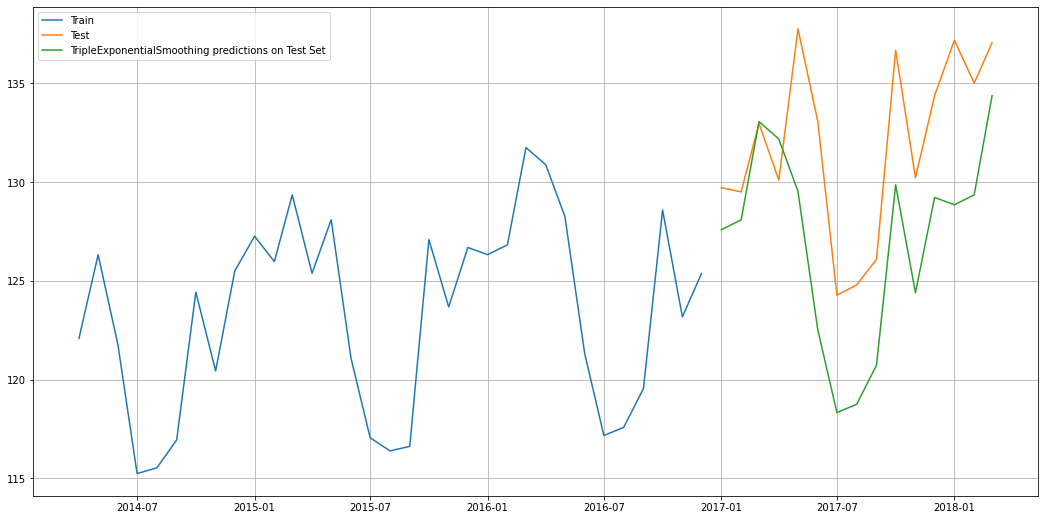

In [473]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['log_sales'], label='Train')
plt.plot(TES_test['log_sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [474]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['log_sales'],TES_test['auto_predict'],squared=False)
print("Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 5.802


In [475]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime             9.427249
TripleExponentialSmoothing   5.801987

In [476]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [477]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test_K))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['log_sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['log_sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [478]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
0             0.1          0.1           0.1    1.724495   5.685034
1             0.1          0.1           0.2    1.673511   5.707620
2             0.1          0.1           0.3    1.625636   5.749920
3             0.1          0.1           0.4    1.581195   5.809432
4             0.1          0.1           0.5    1.540537   5.883931
..            ...          ...           ...         ...        ...
724           0.9          0.9           0.5    2.620919  16.837215
725           0.9          0.9           0.6    2.661040  13.692230
726           0.9          0.9           0.7    2.752859  10.684016
727           0.9          0.9           0.8    2.891362   8.011977
728           0.9          0.9           0.9    3.070154   6.203214

[729 rows x 5 columns]

In [479]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
638           0.8          0.8           0.9    2.548761   5.309918
566           0.7          0.9           0.9    2.466228   5.391253
629           0.8          0.7           0.9    2.382353   5.413841
485           0.6          0.9           0.9    2.254836   5.444393
557           0.7          0.8           0.9    2.326291   5.445563

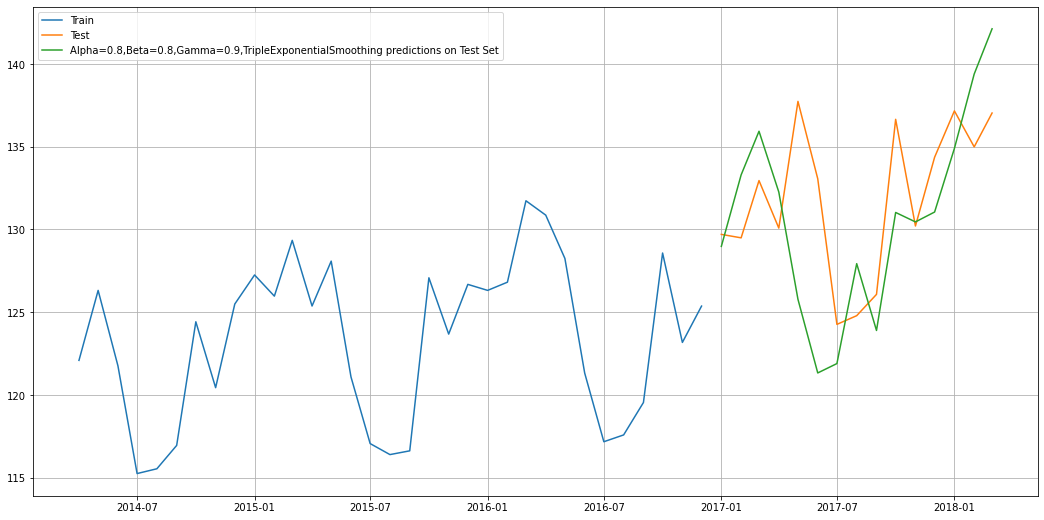

In [480]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['log_sales'], label='Train')
plt.plot(TES_test['log_sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.8, 0.8, 0.9], label='Alpha=0.8,Beta=0.8,Gamma=0.9,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [481]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.8,Beta=0.8,Gamma=0.9,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                     9.427249
TripleExponentialSmoothing                           5.801987
Alpha=0.8,Beta=0.8,Gamma=0.9,TripleExponentialS...   5.309918

In [482]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

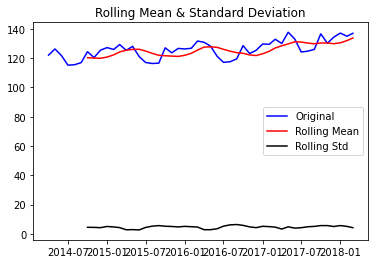

Results of Dickey-Fuller Test:
Test Statistic                  1.242945
p-value                         0.996270
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64 



In [483]:
test_stationarity(df_K['log_sales'])

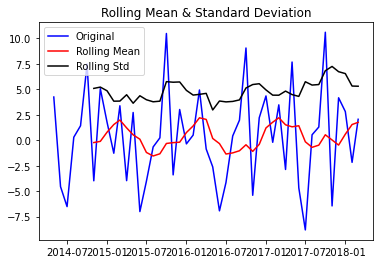

Results of Dickey-Fuller Test:
Test Statistic                 -4.939861
p-value                         0.000029
#Lags Used                     10.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64 



In [484]:
test_stationarity(df_K['log_sales'].diff().dropna())

In [485]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 2)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (1, 1, 0)
Model: (1, 1, 1)


In [486]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [487]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_K['log_sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

ARIMA(0, 1, 0) - AIC:190.2831479839553
ARIMA(0, 1, 1) - AIC:191.7941369170865
ARIMA(1, 1, 0) - AIC:191.74420594340552
ARIMA(1, 1, 1) - AIC:193.53309531888993


In [488]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param         AIC
0  (0, 1, 0)  190.283148
2  (1, 1, 0)  191.744206
1  (0, 1, 1)  191.794137
3  (1, 1, 1)  193.533095

In [489]:
auto_ARIMA = ARIMA(train_K['log_sales'], order=(0,1,0))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.log_sales   No. Observations:                   32
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -93.142
Method:                           css   S.D. of innovations              4.445
Date:                Thu, 09 Sep 2021   AIC                            190.283
Time:                        20:38:16   BIC                            193.215
Sample:                    05-01-2014   HQIC                           191.255
                         - 12-01-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1025      0.786      0.130      0.896      -1.437       1.643


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [490]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_K))

In [491]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test_K['log_sales'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

7.117171395725669


In [492]:
resultsDf_autoarima = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])

resultsDf=pd.concat([resultsDf_autoarima,resultsDf])

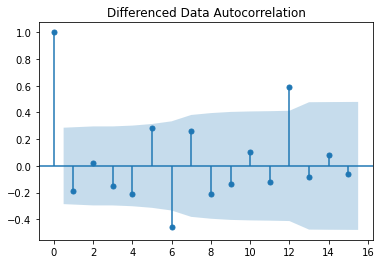

In [493]:
#plot_acf(df['RetailSales'],lags=50)
plot_acf(df_K['log_sales'].diff().dropna(),lags=15,title='Differenced Data Autocorrelation')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


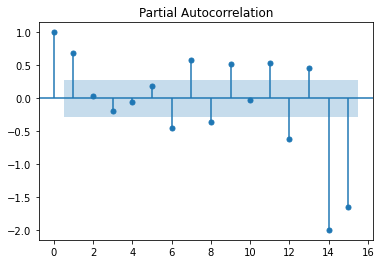

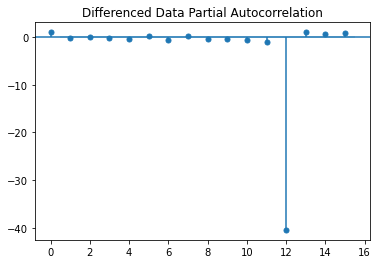

In [494]:
plot_pacf(df_K['log_sales'],lags=15)
plot_pacf(df_K['log_sales'].diff().dropna(),lags=15,title='Differenced Data Partial Autocorrelation')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


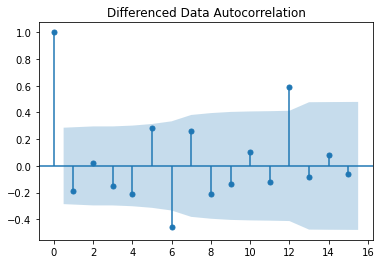

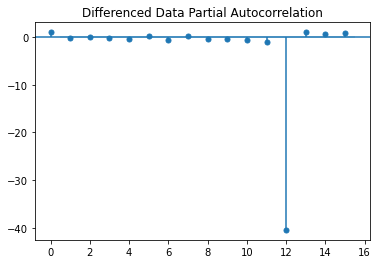

In [495]:
plot_acf(df_K['log_sales'].diff().dropna(),lags=15,title='Differenced Data Autocorrelation')
plot_pacf(df_K['log_sales'].diff().dropna(),lags=15,title='Differenced Data Partial Autocorrelation')
plt.show()

In [498]:
manual_ARIMA = ARIMA(train_K['log_sales'].astype('float64'), order=(1,0,1)) #order = (p=0,d=1,q=0)

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                              ARMA Model Results                              
Dep. Variable:              log_sales   No. Observations:                   33
Model:                     ARMA(1, 1)   Log Likelihood                 -91.724
Method:                       css-mle   S.D. of innovations              3.876
Date:                Thu, 09 Sep 2021   AIC                            191.448
Time:                        20:46:49   BIC                            197.434
Sample:                    04-01-2014   HQIC                           193.462
                         - 12-01-2016                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             123.3408      1.418     86.977      0.000     120.561     126.120
ar.L1.log_sales     0.5015      0.208      2.415      0.016       0.094       0.909
ma.L1.log_sales     0.0813      

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [499]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_K))

In [500]:
rmse = mean_squared_error(test_K['log_sales'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

9.51279007021315


In [501]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(1,0,1)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
ARIMA(0,1,0)                                         7.117171
RegressionOnTime                                     9.427249
TripleExponentialSmoothing                           5.801987
Alpha=0.8,Beta=0.8,Gamma=0.9,TripleExponentialS...   5.309918
ARIMA(1,0,1)                                         9.512790

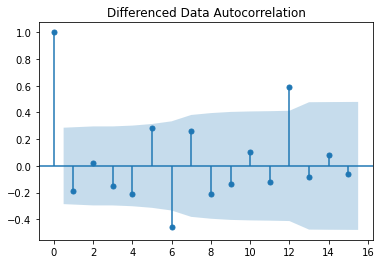

In [502]:
plot_acf(df_K['log_sales'].diff().dropna(),lags=15,title='Differenced Data Autocorrelation')
plt.show()

In [503]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p,d,q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [504]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [505]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_K['log_sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:88.65872168276502
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:90.65482576360937
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:92.65482576870332
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:90.65482580779707
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:92.6548257817707
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:94.65482575099956


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:92.65482580795567
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:94.65482576921475
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:96.65482573492986
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:84.84372894917922
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:86.50678956117895
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:88.50678726962445
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:86.50679215849495
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:88.5067908032382
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:90.50678712514241
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:88.50679215934166
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:90.50679010343451
SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:92.50678763766174
SARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:84.92167228956149
SARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC:86.6844148775455
SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:88.68441547775778
SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:86.68441679731669
SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:88.68441585007365
SARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:90.68441591757093
SARIMA(0, 1, 2)x(2, 1, 0, 12) 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:86.08107225150515
SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:87.714623231467
SARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:89.71316334344593
SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:87.71479766303811
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:89.71471148847247
SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:91.71279348379191
SARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:89.71035813358237
SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:91.7103885428572
SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:93.71051622295205
SARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:86.74818426470453
SARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:88.51015863814762
SARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:90.51017462410385
SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:88.5101201633462
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:90.51013974318373
SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:92.5101573696472
SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:90.51012132048838
SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:92.50883934156678
SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:94.51014641188473
SARIMA(2, 1, 0)x(0, 1, 0, 12) - A

In [506]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal        AIC
72  (2, 1, 2)  (0, 1, 0, 12)  82.722075
63  (2, 1, 1)  (0, 1, 0, 12)  83.142174
73  (2, 1, 2)  (0, 1, 1, 12)  84.673408
75  (2, 1, 2)  (1, 1, 0, 12)  84.679588
9   (0, 1, 1)  (0, 1, 0, 12)  84.843729

In [507]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_K['log_sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   33
Model:             SARIMAX(2, 1, 2)x(0, 1, [], 12)   Log Likelihood                 -36.361
Date:                             Thu, 09 Sep 2021   AIC                             82.722
Time:                                     20:52:50   BIC                             87.701
Sample:                                          0   HQIC                            83.694
                                              - 33                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5107      0.502      1.017      0.309      -0.474       1.495
ar.L2         -0.6285      

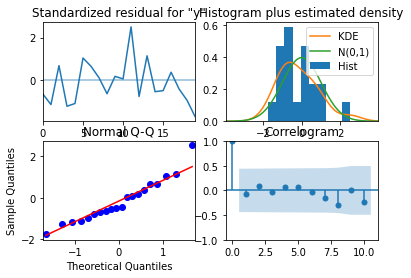

In [508]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [509]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test_K))

In [510]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean   mean_se  mean_ci_lower  mean_ci_upper
0  128.616663  1.321226     126.027107     131.206218
1  130.273293  1.319370     127.687375     132.859210
2  133.516967  1.535223     130.507985     136.525949
3  131.062994  1.581849     127.962626     134.163361
4  128.688714  1.616476     125.520480     131.856949

In [511]:
rmse = mean_squared_error(test_K['log_sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

5.689878933983792


In [512]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(2,1,2)(0,1,0,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
ARIMA(0,1,0)                                         7.117171
RegressionOnTime                                     9.427249
TripleExponentialSmoothing                           5.801987
Alpha=0.8,Beta=0.8,Gamma=0.9,TripleExponentialS...   5.309918
ARIMA(1,0,1)                                         9.512790
SARIMA(2,1,2)(0,1,0,12)                              5.689879

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


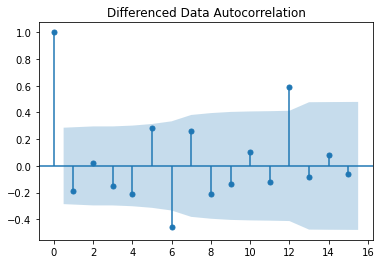

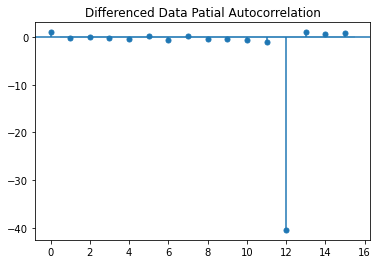

In [513]:
plot_acf(df_K['log_sales'].diff().dropna(),lags=15,title='Differenced Data Autocorrelation')
plot_pacf(df_K['log_sales'].diff().dropna(),lags=15,title='Differenced Data Patial Autocorrelation')
plt.show()

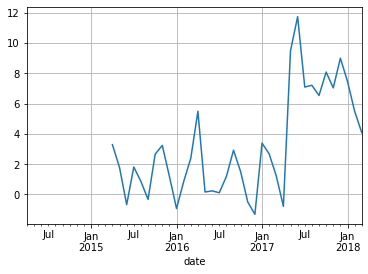

In [514]:
(df_K['log_sales'].diff(12)).plot()
plt.grid();

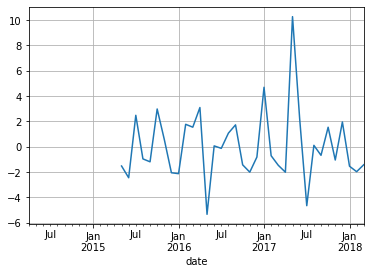

In [515]:
(df_K['log_sales'].diff(12)).diff().plot()
plt.grid();

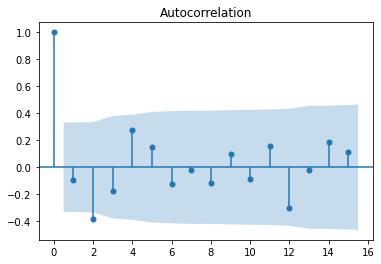

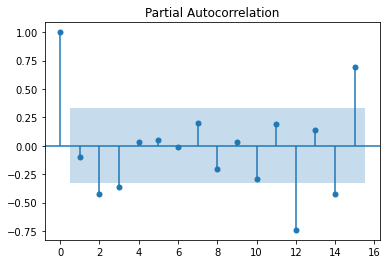

In [516]:
plot_acf((df_K['log_sales'].diff(12).dropna()).diff().dropna(),lags=15)
plot_pacf((df_K['log_sales'].diff(12).dropna()).diff().dropna(),lags=15);

In [520]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_K['log_sales'].values,
                                order=(4,1,2),
                                seasonal_order=(0,1,1,12),
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   33
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood                 -35.829
Date:                              Thu, 09 Sep 2021   AIC                             87.658
Time:                                      21:07:34   BIC                             95.624
Sample:                                           0   HQIC                            89.213
                                               - 33                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2321      2.735     -0.085      0.932      -5.593       5.129
ar.L2         -0.56

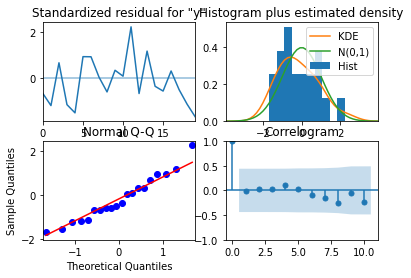

In [521]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [522]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test_K))

In [523]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean   mean_se  mean_ci_lower  mean_ci_upper
0  128.461222  1.272989     125.966210     130.956234
1  130.285804  1.275564     127.785744     132.785863
2  133.734582  1.425854     130.939960     136.529203
3  131.403667  1.468832     128.524809     134.282525
4  128.049989  1.495667     125.118536     130.981443

In [524]:
rmse = mean_squared_error(test_K['log_sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

5.770938384456557


In [525]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(4,1,2)(0,1,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
ARIMA(0,1,0)                                         7.117171
RegressionOnTime                                     9.427249
TripleExponentialSmoothing                           5.801987
Alpha=0.8,Beta=0.8,Gamma=0.9,TripleExponentialS...   5.309918
ARIMA(1,0,1)                                         9.512790
SARIMA(2,1,2)(0,1,0,12)                              5.689879
SARIMA(4,1,2)(0,1,1,12)                              5.770938

In [526]:
resultsDf.sort_values('Test RMSE',ascending=True)

Test RMSE
Alpha=0.8,Beta=0.8,Gamma=0.9,TripleExponentialS...   5.309918
SARIMA(2,1,2)(0,1,0,12)                              5.689879
SARIMA(4,1,2)(0,1,1,12)                              5.770938
TripleExponentialSmoothing                           5.801987
ARIMA(0,1,0)                                         7.117171
RegressionOnTime                                     9.427249
ARIMA(1,0,1)                                         9.512790